# Predict the Credit_Mix category for a customer based on their financial data, and provide actionable insights to improve credit health.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Bank%20Data.csv'
df = pd.read_csv(url)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [3]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

# Project Workflow

In order to do this project, must follow this structure....

## 1. Data Preprocessing
- Handle missing and invalid values in the dataset.
- Encode categorical variables appropriately.
- Scale and normalize numeric features for uniformity.
- Detect and address outliers to improve model stability.

In [4]:
# saving DataFrame
# df.to_csv('Predicting_customer_creditMix.csv')

In [5]:
df.shape

(50000, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [7]:
# creating new dataFrame
df_new = pd.DataFrame()

 #### =>Handling missing and invalid values in the entire dataset

In [8]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [9]:
# analysing Month feature
df.Month.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Month
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [10]:
df.Month.value_counts()

Month
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64

In [11]:
df.Month.nunique()

4

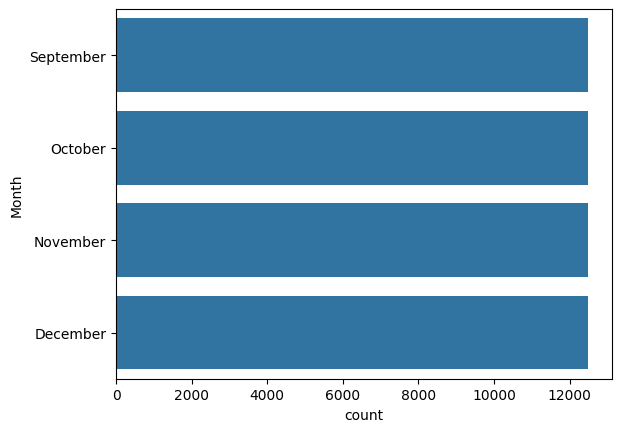

In [12]:
sns.countplot(df.Month)
plt.show()

In [13]:
# analysing Name feature
df.Name.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
44985 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [14]:
df.Name.isnull().sum()

np.int64(5015)

In [15]:
df.Name.nunique()

10139

In [16]:
df.Name.value_counts()

Name
Stevex                22
Langep                21
Nicko                 20
Deepa Seetharamanm    20
Raymondr              20
                      ..
Subhadip Sircary       1
Vera Eckerto           1
James Regann           1
Kerberj                1
Wahbas                 1
Name: count, Length: 10139, dtype: int64

In [17]:
# analysing Age column
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [18]:
df.loc[:20,["Customer_ID","Month","Name","Age"]]

,Customer_ID,Month,Name,Age
0,CUS_0xd40,September,Aaron Maashoh,23
1,CUS_0xd40,October,Aaron Maashoh,24
2,CUS_0xd40,November,Aaron Maashoh,24
3,CUS_0xd40,December,Aaron Maashoh,24_
4,CUS_0x21b1,September,Rick Rothackerj,28
5,CUS_0x21b1,October,Rick Rothackerj,28
6,CUS_0x21b1,November,Rick Rothackerj,28
7,CUS_0x21b1,December,Rick Rothackerj,28
8,CUS_0x2dbc,September,Langep,35
9,CUS_0x2dbc,October,Langep,35


In [19]:
df.Age = pd.to_numeric(df.Age,errors='coerce') # converting object to numeric

In [20]:
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
47523 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [21]:
df.Age.isnull().sum()

np.int64(2477)

In [22]:
df.loc[df.Age.isnull(),'Age']

3       NaN
40      NaN
43      NaN
55      NaN
77      NaN
         ..
49827   NaN
49870   NaN
49957   NaN
49980   NaN
49991   NaN
Name: Age, Length: 2477, dtype: float64

In [23]:
age_median = df.Age.median()
age_median

np.float64(34.0)

In [24]:
df.loc[:,["Age"]].median()

Age    34.0
dtype: float64

In [25]:
df.loc[~((df.Age>100)|(df.Age<18)),["Age"]].median()

Age    34.0
dtype: float64

In [26]:
df.loc[(df.Age>100)|(df.Age<18),["Age"]] # assuming age can't be more than 100 and less than 18

,Age
22,1694.0
34,914.0
131,-500.0
144,16.0
145,16.0
...,...
49902,17.0
49903,17.0
49935,7910.0
49986,5826.0


In [27]:
# filling null values with age median
df.fillna({"Age":age_median},inplace=True)

In [28]:
df.loc[df.Age.isnull(),"Age"]

Series([], Name: Age, dtype: float64)

In [29]:
df.Age.isnull().sum()

np.int64(0)

In [30]:
df.loc[(df.Age>100)|(df.Age<18),["Age"]]

,Age
22,1694.0
34,914.0
131,-500.0
144,16.0
145,16.0
...,...
49902,17.0
49903,17.0
49935,7910.0
49986,5826.0


In [31]:
df.Age.describe()

count    50000.000000
mean       106.349960
std        665.385116
min       -500.000000
25%         25.000000
50%         34.000000
75%         42.000000
max       8688.000000
Name: Age, dtype: float64

In [32]:
# calculating IQR that will detect Outlier in any column
def calculate_IQR(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    return lower, upper

In [33]:
l,u = calculate_IQR("Age")

In [34]:
print(l,u)

-0.5 67.5


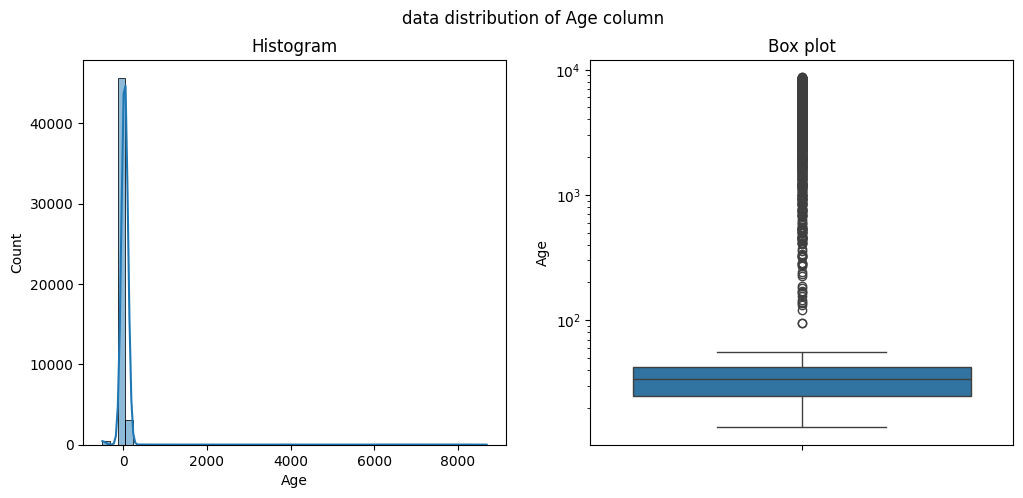

In [35]:
# plt.title("data distribution of Age column")
fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Age column")
sns.histplot(df.Age,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Age,ax=axs[1])
axs[1].set_title("Box plot")
axs[1].set_yscale("log")


plt.show()


In [36]:
print(df.loc[(df.Age > 100)|(df.Age < 18),"Age"].count())
print(df.loc[(df.Age > u)|(df.Age < 18),"Age"].count())

3735
3737


In [37]:
df.loc[(df.Age > u)|(df.Age <= 18.0),["Age"]] = age_median # 

In [38]:
df.Age.describe()

count    50000.000000
mean        34.948900
std          9.297033
min         19.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         56.000000
Name: Age, dtype: float64

In [39]:
df.loc[(df.Age>u)|(df.Age<18.0),["Age"]]

,Age


In [40]:
df.loc[18:25,"Age"]

18    22.0
19    22.0
20    31.0
21    32.0
22    34.0
23    32.0
24    34.0
25    34.0
Name: Age, dtype: float64

In [41]:
df.loc[129:133,"Age"]

129    22.0
130    22.0
131    34.0
132    44.0
133    44.0
Name: Age, dtype: float64

In [42]:
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
50000 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [43]:
df_new["Age"] = df.Age.astype(int)

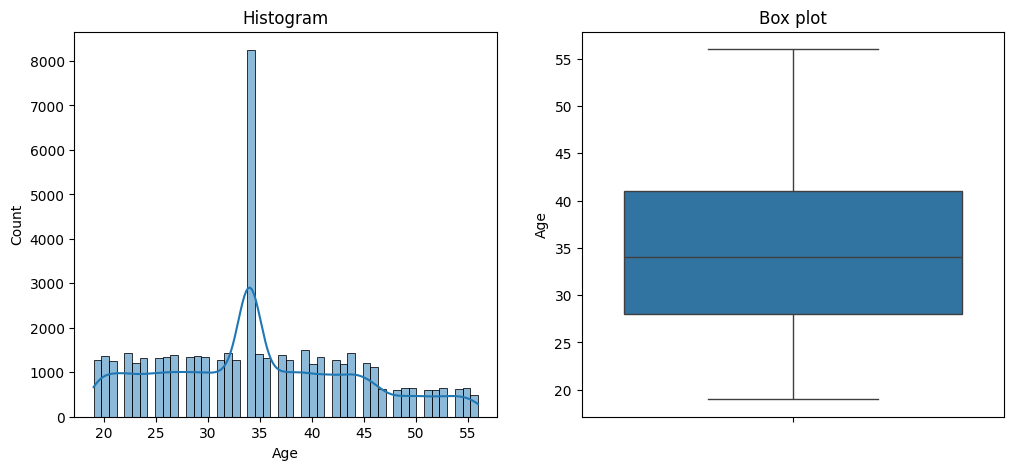

In [44]:
# plt.title("data distribution of Age column")
fig,axs = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df_new.Age,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df_new.Age,ax=axs[1])
axs[1].set_title("Box plot")
# axs[1].set_yscale("log")

plt.show()

In [45]:
df_new

,Age
0,23
1,24
2,24
3,34
4,28
...,...
49995,34
49996,25
49997,25
49998,25


In [46]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [47]:
df.Occupation.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Occupation
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [48]:
df.Occupation.nunique()

16

In [49]:
df.Occupation.value_counts()

Occupation
_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: count, dtype: int64

In [50]:
weird_entries_occu = '_______'
df_new["Occupation"] = df.Occupation.replace(weird_entries_occu,'Unknown')

In [51]:
df_new.Occupation.value_counts()

Occupation
Unknown          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: count, dtype: int64

In [52]:
df.Annual_Income.info() # analysing annual income column

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Annual_Income
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [53]:
df.Annual_Income.value_counts()

Annual_Income
9141.63       8
109945.32     8
36585.12      8
17816.75      8
22434.16      8
             ..
20601508.0    1
29469.98_     1
18940.82_     1
35793.97_     1
31700.3_      1
Name: count, Length: 16121, dtype: int64

In [54]:
df.loc[513:516,"Annual_Income"]

513     140014.36
514    140014.36_
515    140014.36_
516       37071.2
Name: Annual_Income, dtype: object

In [55]:
df["Annual_Income"] = pd.to_numeric(df.Annual_Income,errors="coerce")

In [56]:
df.loc[513:516,"Annual_Income"]

513    140014.36
514          NaN
515          NaN
516     37071.20
Name: Annual_Income, dtype: float64

In [57]:
df.Annual_Income.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Annual_Income
Non-Null Count  Dtype  
--------------  -----  
46480 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [58]:
df.Annual_Income.isnull().sum()

np.int64(3520)

In [59]:
df.Annual_Income.max()

np.float64(24137255.0)

In [60]:
df.Annual_Income.min()

np.float64(7005.93)

In [61]:
annual_income_median = df.Annual_Income.median()
annual_income_median

np.float64(37575.869999999995)

In [62]:
df.loc[513:516,"Annual_Income"]

513    140014.36
514          NaN
515          NaN
516     37071.20
Name: Annual_Income, dtype: float64

In [63]:
df.Annual_Income.describe()

count    4.648000e+04
mean     1.651169e+05
std      1.341967e+06
min      7.005930e+03
25%      1.943560e+04
50%      3.757587e+04
75%      7.276004e+04
max      2.413726e+07
Name: Annual_Income, dtype: float64

In [64]:
# df.Annual_Income.fillna(annual_income_median,inplace=True)
df.fillna({"Annual_Income":annual_income_median},inplace=True)

In [65]:
df.loc[513:516,"Annual_Income"]

513    140014.36
514     37575.87
515     37575.87
516     37071.20
Name: Annual_Income, dtype: float64

In [66]:
df.Annual_Income.describe()

count    5.000000e+04
mean     1.561380e+05
std      1.294278e+06
min      7.005930e+03
25%      2.006286e+04
50%      3.757587e+04
75%      6.995556e+04
max      2.413726e+07
Name: Annual_Income, dtype: float64

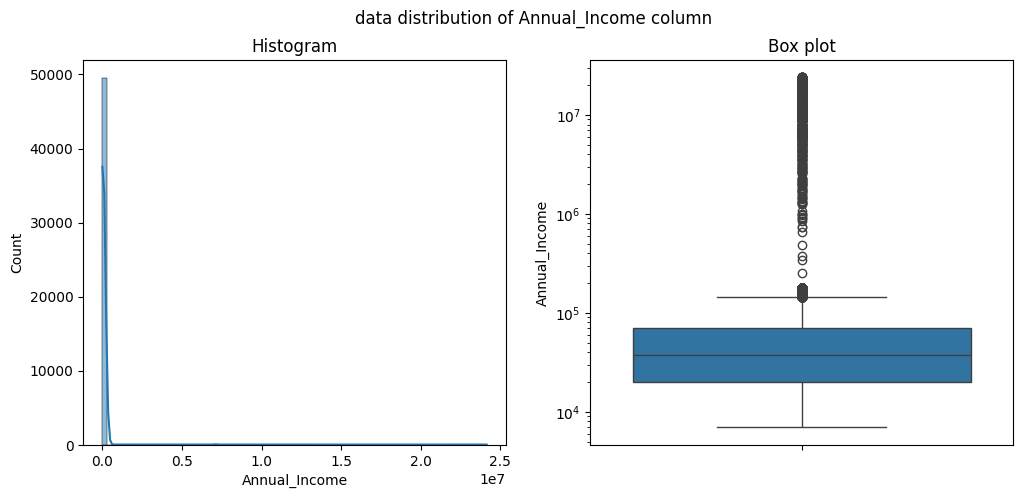

In [67]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Annual_Income column")
sns.histplot(df.Annual_Income,bins=80,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Annual_Income,ax=axs[1])
axs[1].set_title("Box plot")
axs[1].set_yscale("log")


plt.show()


In [68]:
df_new["Annual_Income"] = df.Annual_Income
df_new

,Age,Occupation,Annual_Income
0,23,Scientist,19114.12
1,24,Scientist,19114.12
2,24,Scientist,19114.12
3,34,Scientist,19114.12
4,28,Unknown,34847.84
...,...,...,...
49995,34,Architect,20002.88
49996,25,Mechanic,39628.99
49997,25,Mechanic,39628.99
49998,25,Mechanic,39628.99


In [69]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [70]:
df.Monthly_Inhand_Salary.info() # analysing Monthly_Inhand_Salary column

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Monthly_Inhand_Salary
Non-Null Count  Dtype  
--------------  -----  
42502 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [71]:
df.Monthly_Inhand_Salary.value_counts()

Monthly_Inhand_Salary
1315.560833    8
3080.555000    7
536.431250     7
5766.491667    7
4387.272500    7
              ..
699.392713     1
2872.802500    1
1462.177500    1
6148.627500    1
1401.694167    1
Name: count, Length: 12793, dtype: int64

In [72]:
df.loc[df.Monthly_Inhand_Salary.isnull(),"Monthly_Inhand_Salary"]

3       NaN
8       NaN
27      NaN
29      NaN
34      NaN
         ..
49964   NaN
49983   NaN
49987   NaN
49996   NaN
49998   NaN
Name: Monthly_Inhand_Salary, Length: 7498, dtype: float64

In [73]:
df.Monthly_Inhand_Salary.describe()

count    42502.000000
mean      4182.004291
std       3174.109304
min        303.645417
25%       1625.188333
50%       3086.305000
75%       5934.189094
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [74]:
Monthly_Inhand_Salary_median = df.Monthly_Inhand_Salary.median()
Monthly_Inhand_Salary_median

np.float64(3086.305)

In [75]:
# df.Monthly_Inhand_Salary.fillna(Monthly_Inhand_Salary_median,inplace=True)
df.fillna({"Monthly_Inhand_Salary":Monthly_Inhand_Salary_median},inplace=True)

In [76]:
df.loc[df.Monthly_Inhand_Salary.isnull(),"Monthly_Inhand_Salary"]

Series([], Name: Monthly_Inhand_Salary, dtype: float64)

In [77]:
df.Monthly_Inhand_Salary.isnull().sum()

np.int64(0)

In [78]:
df.Monthly_Inhand_Salary.describe()

count    50000.000000
mean      4017.693225
std       2952.479911
min        303.645417
25%       1794.304167
50%       3086.305000
75%       5338.967500
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

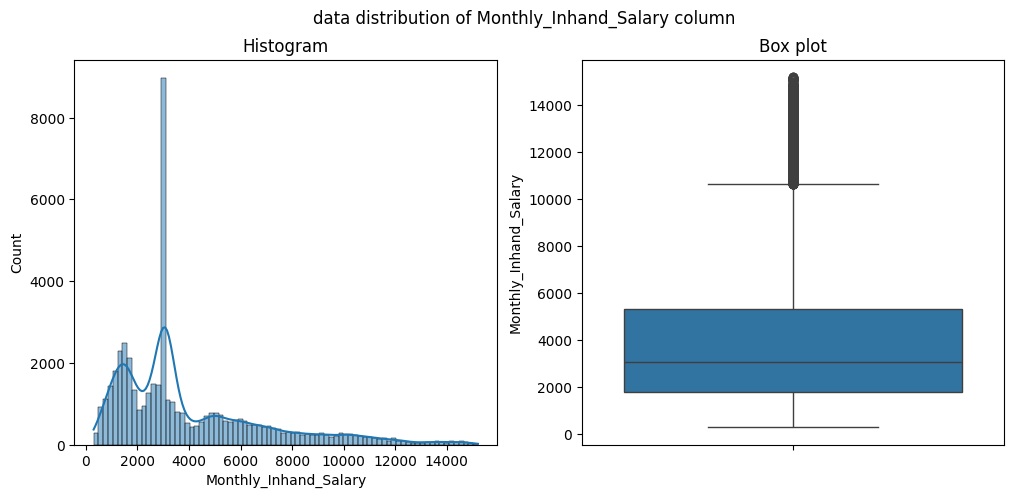

In [79]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Monthly_Inhand_Salary column")
sns.histplot(df.Monthly_Inhand_Salary,bins=80,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Monthly_Inhand_Salary,ax=axs[1])
axs[1].set_title("Box plot")
# axs[1].set_yscale("log")


plt.show()


In [80]:
df_new["Monthly_Inhand_Salary"] = df.Monthly_Inhand_Salary
df_new

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary
0,23,Scientist,19114.12,1824.843333
1,24,Scientist,19114.12,1824.843333
2,24,Scientist,19114.12,1824.843333
3,34,Scientist,19114.12,3086.305000
4,28,Unknown,34847.84,3037.986667
...,...,...,...,...
49995,34,Architect,20002.88,1929.906667
49996,25,Mechanic,39628.99,3086.305000
49997,25,Mechanic,39628.99,3359.415833
49998,25,Mechanic,39628.99,3086.305000


In [81]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [82]:
df.Num_Bank_Accounts.info() # analysing Num_Bank_Accounts column

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Num_Bank_Accounts
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


In [83]:
df.Num_Bank_Accounts.value_counts()

Num_Bank_Accounts
6       6504
7       6408
8       6387
4       6100
5       6068
        ... 
800        1
976        1
207        1
1395       1
802        1
Name: count, Length: 540, dtype: int64

In [84]:
df.Num_Bank_Accounts.nunique()

540

In [85]:
df.Num_Bank_Accounts.describe() # detected unrealistic values

count    50000.000000
mean        16.838260
std        116.396848
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [86]:
NumBankAccount_l,NumBankAccount_u = calculate_IQR("Num_Bank_Accounts")
print(NumBankAccount_l,NumBankAccount_u)

-3.0 13.0


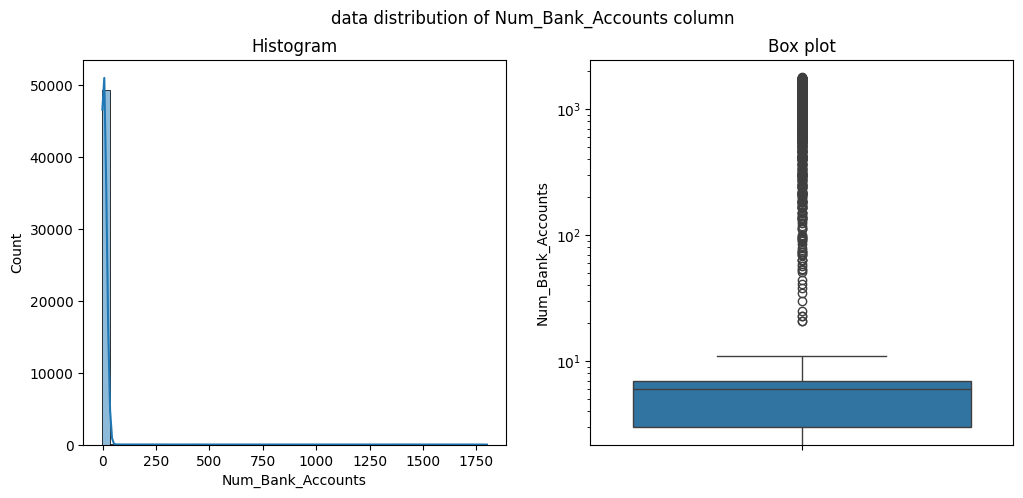

In [87]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Num_Bank_Accounts column")
sns.histplot(df.Num_Bank_Accounts,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Num_Bank_Accounts,ax=axs[1])
axs[1].set_title("Box plot")
axs[1].set_yscale("log")


plt.show()


In [88]:
Num_Bank_Accounts_media = df.Num_Bank_Accounts.median()
Num_Bank_Accounts_media

np.float64(6.0)

In [89]:
df.loc[(df.Num_Bank_Accounts < 0) | (df.Num_Bank_Accounts > NumBankAccount_u),'Num_Bank_Accounts'] = Num_Bank_Accounts_media

In [90]:
df.Num_Bank_Accounts.dtype

dtype('int64')

In [91]:
df.Num_Bank_Accounts.describe()

count    50000.000000
mean         5.377700
std          2.577195
min          0.000000
25%          3.000000
50%          6.000000
75%          7.000000
max         11.000000
Name: Num_Bank_Accounts, dtype: float64

In [92]:
df.Num_Bank_Accounts.median()

np.float64(6.0)

In [93]:
df_new["Num_Bank_Accounts"] = df.Num_Bank_Accounts
df_new

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts
0,23,Scientist,19114.12,1824.843333,3
1,24,Scientist,19114.12,1824.843333,3
2,24,Scientist,19114.12,1824.843333,3
3,34,Scientist,19114.12,3086.305000,3
4,28,Unknown,34847.84,3037.986667,2
...,...,...,...,...,...
49995,34,Architect,20002.88,1929.906667,10
49996,25,Mechanic,39628.99,3086.305000,4
49997,25,Mechanic,39628.99,3359.415833,4
49998,25,Mechanic,39628.99,3086.305000,4


In [94]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [95]:
df_new.loc[df.Num_Bank_Accounts < 0,"Num_Bank_Accounts"]

Series([], Name: Num_Bank_Accounts, dtype: int64)

In [96]:
df.Num_Credit_Card.info() #analysing Num_Credit_Card column

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Num_Credit_Card
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


In [97]:
df.Num_Credit_Card.describe()

count    50000.000000
mean        22.921480
std        129.314804
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

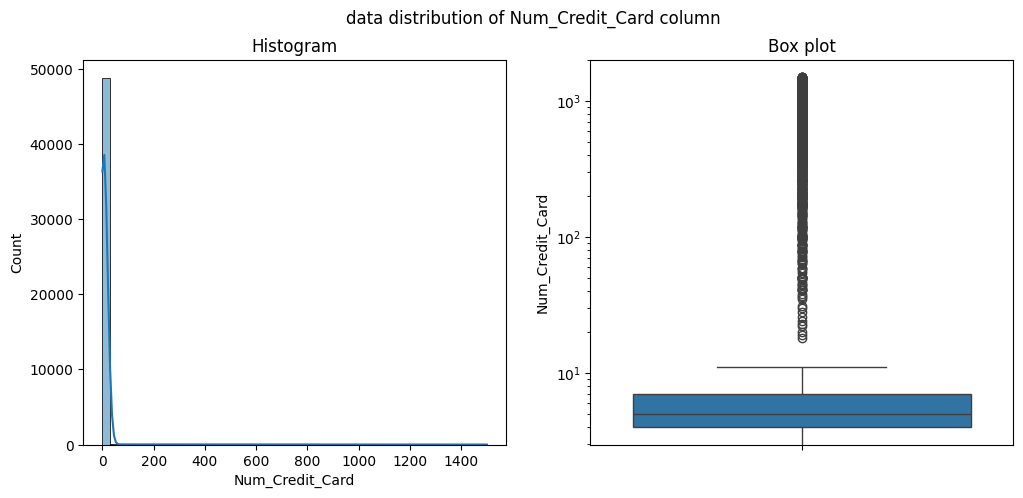

In [98]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Num_Credit_Card column")
sns.histplot(df.Num_Credit_Card,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Num_Credit_Card,ax=axs[1])
axs[1].set_title("Box plot")
axs[1].set_yscale("log")


plt.show()


In [99]:
Num_Credit_Card_median = df.Num_Credit_Card.median()
Num_Credit_Card_median

np.float64(5.0)

In [100]:
q1 = df.Num_Credit_Card.quantile(0.25)
q3 = df.Num_Credit_Card.quantile(0.75)
print(q1,q3)
IQR = q3 - q1
lower_limit = q1 - IQR*1.5
upper_limit = q3 + IQR*1.5
print(int(lower_limit),int(upper_limit))


4.0 7.0
0 11


In [101]:
Num_Credit_Card_l,Num_Credit_Card_u = calculate_IQR("Num_Credit_Card")
print(Num_Credit_Card_l,Num_Credit_Card_u)

-0.5 11.5


In [102]:
df.loc[(df.Num_Credit_Card < int(lower_limit))|(df.Num_Credit_Card > int(upper_limit)),"Num_Credit_Card"] = Num_Credit_Card_median

In [103]:
df.Num_Credit_Card.describe()

count    50000.000000
mean         5.520080
std          2.049507
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

In [104]:
df_new["Num_Credit_Card"] = df.Num_Credit_Card
df_new

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card
0,23,Scientist,19114.12,1824.843333,3,4
1,24,Scientist,19114.12,1824.843333,3,4
2,24,Scientist,19114.12,1824.843333,3,4
3,34,Scientist,19114.12,3086.305000,3,4
4,28,Unknown,34847.84,3037.986667,2,4
...,...,...,...,...,...,...
49995,34,Architect,20002.88,1929.906667,10,8
49996,25,Mechanic,39628.99,3086.305000,4,6
49997,25,Mechanic,39628.99,3359.415833,4,6
49998,25,Mechanic,39628.99,3086.305000,4,6


In [105]:
df_new.Num_Credit_Card.dtype

dtype('int64')

In [106]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [107]:
df.Interest_Rate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Interest_Rate
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


In [108]:
df.Interest_Rate.describe()

count    50000.000000
mean        68.772640
std        451.602363
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5799.000000
Name: Interest_Rate, dtype: float64

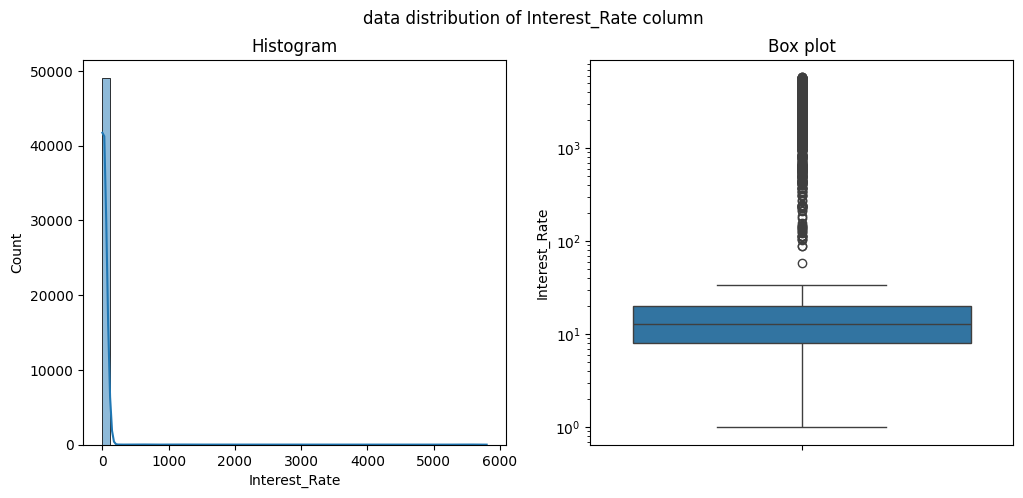

In [109]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Interest_Rate column")
sns.histplot(df.Interest_Rate,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Interest_Rate,ax=axs[1])
axs[1].set_title("Box plot")
axs[1].set_yscale("log")


plt.show()


In [110]:
Interest_Rate_l,Interest_Rate_u = calculate_IQR("Interest_Rate")
print(Interest_Rate_l,Interest_Rate_u)

-10.0 38.0


In [111]:
Interest_Rate_media = df.Interest_Rate.median()
Interest_Rate_media

np.float64(13.0)

In [112]:
df.loc[(df.Interest_Rate < 0)|(df.Interest_Rate > int(Interest_Rate_u)),"Interest_Rate"] = int(Interest_Rate_media)

In [113]:
df.Interest_Rate.describe()

count    50000.000000
mean        14.501960
std          8.661373
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [114]:
df.Interest_Rate.dtype

dtype('int64')

In [115]:
df_new["Interest_Rate"] = df.Interest_Rate
df_new

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate
0,23,Scientist,19114.12,1824.843333,3,4,3
1,24,Scientist,19114.12,1824.843333,3,4,3
2,24,Scientist,19114.12,1824.843333,3,4,3
3,34,Scientist,19114.12,3086.305000,3,4,3
4,28,Unknown,34847.84,3037.986667,2,4,6
...,...,...,...,...,...,...,...
49995,34,Architect,20002.88,1929.906667,10,8,29
49996,25,Mechanic,39628.99,3086.305000,4,6,7
49997,25,Mechanic,39628.99,3359.415833,4,6,7
49998,25,Mechanic,39628.99,3086.305000,4,6,7


In [116]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [117]:
df.Num_of_Loan.info() #analysis of Num_of_Loan

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Num_of_Loan
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [118]:
df.Num_of_Loan.head()

0    4
1    4
2    4
3    4
4    1
Name: Num_of_Loan, dtype: object

In [119]:
df["Num_of_Loan"] = pd.to_numeric(df.Num_of_Loan, errors="coerce")

In [120]:
df.Num_of_Loan.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Num_of_Loan
Non-Null Count  Dtype  
--------------  -----  
47564 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [121]:
df.Num_of_Loan.isnull().sum()

np.int64(2436)

In [122]:
df.loc[df.Num_of_Loan.isnull(),"Num_of_Loan"]

76      NaN
111     NaN
130     NaN
158     NaN
167     NaN
         ..
49952   NaN
49966   NaN
49976   NaN
49996   NaN
49998   NaN
Name: Num_of_Loan, Length: 2436, dtype: float64

In [123]:
# df.Num_of_Loan.fillna(df.Num_of_Loan.median(),inplace=True)
df.fillna({"Num_of_Loan":df.Num_of_Loan.median()},inplace=True)

In [124]:
df.Num_of_Loan.isnull().sum()

np.int64(0)

In [125]:
df.Num_of_Loan.describe()

count    50000.000000
mean         3.254740
std         65.483676
min       -100.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [126]:
df.Num_of_Loan.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Num_of_Loan
Non-Null Count  Dtype  
--------------  -----  
50000 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [127]:
Num_of_Loan_l,Num_of_Loan_u = calculate_IQR("Num_of_Loan")
print(Num_of_Loan_l,int(Num_of_Loan_u))

-2.5 9


In [128]:
df.Num_of_Loan.median()

np.float64(3.0)

In [129]:
df.loc[(df.Num_of_Loan < 0.0)|(df.Num_of_Loan > Num_of_Loan_u),"Num_of_Loan"] = df.Num_of_Loan.median()

In [130]:
df.Num_of_Loan.describe()

count    50000.000000
mean         3.483900
std          2.334012
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

In [131]:
df.Num_of_Loan.dtype

dtype('float64')

In [132]:
df["Num_of_Loan"] = df.Num_of_Loan.astype(int)

In [133]:
df.Num_of_Loan.dtype

dtype('int64')

In [134]:
df_new["Num_of_Loan"] = df.Num_of_Loan

In [135]:
df_new

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan
0,23,Scientist,19114.12,1824.843333,3,4,3,4
1,24,Scientist,19114.12,1824.843333,3,4,3,4
2,24,Scientist,19114.12,1824.843333,3,4,3,4
3,34,Scientist,19114.12,3086.305000,3,4,3,4
4,28,Unknown,34847.84,3037.986667,2,4,6,1
...,...,...,...,...,...,...,...,...
49995,34,Architect,20002.88,1929.906667,10,8,29,5
49996,25,Mechanic,39628.99,3086.305000,4,6,7,3
49997,25,Mechanic,39628.99,3359.415833,4,6,7,2
49998,25,Mechanic,39628.99,3086.305000,4,6,7,3


In [136]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [137]:
df.Type_of_Loan.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Type_of_Loan
Non-Null Count  Dtype 
--------------  ----- 
44296 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [138]:
df.Type_of_Loan.value_counts()[:20]

Type_of_Loan
Not Specified                               704
Credit-Builder Loan                         640
Personal Loan                               636
Debt Consolidation Loan                     632
Student Loan                                620
Payday Loan                                 600
Mortgage Loan                               588
Auto Loan                                   576
Home Equity Loan                            568
Personal Loan, and Student Loan             160
Not Specified, and Payday Loan              136
Mortgage Loan, and Home Equity Loan         132
Student Loan, and Payday Loan               128
Credit-Builder Loan, and Not Specified      124
Student Loan, and Credit-Builder Loan       124
Payday Loan, and Debt Consolidation Loan    120
Payday Loan, and Auto Loan                  120
Credit-Builder Loan, and Mortgage Loan      116
Payday Loan, and Personal Loan              116
Personal Loan, and Credit-Builder Loan      116
Name: count, dtype: int64

In [139]:
df.Type_of_Loan.value_counts()[-20:]

Type_of_Loan
Not Specified, Mortgage Loan, Personal Loan, and Debt Consolidation Loan                                                     4
Personal Loan, Credit-Builder Loan, Student Loan, Not Specified, Personal Loan, Student Loan, and Debt Consolidation Loan    4
Payday Loan, Credit-Builder Loan, Not Specified, and Personal Loan                                                           4
Mortgage Loan, Credit-Builder Loan, Home Equity Loan, Student Loan, and Auto Loan                                            4
Personal Loan, Auto Loan, Debt Consolidation Loan, and Payday Loan                                                           4
Student Loan, Debt Consolidation Loan, Student Loan, and Home Equity Loan                                                    4
Debt Consolidation Loan, Credit-Builder Loan, Home Equity Loan, and Mortgage Loan                                            4
Debt Consolidation Loan, Payday Loan, Not Specified, Auto Loan, Debt Consolidation Loan, and Stude

In [140]:
df.Type_of_Loan.isnull().sum()

np.int64(5704)

In [141]:
# df.Type_of_Loan.fillna("Not Specified",inplace=True)
df.fillna({"Type_of_Loan":"Not Specified"},inplace=True)

In [142]:
df.Type_of_Loan.isnull().sum()

np.int64(0)

In [143]:
# spliting loan types and creating new features using these loan types
loan_types = set()
for loans in df["Type_of_Loan"]:
    # print(loans)
    for loan in str(loans).split(","):
        # print(loan)
        loan = loan.replace("and","")
        loan = loan.strip()
        if loan != "":
            loan_types.add(loan)

In [144]:

loan_types = list(loan_types)
print(loan_types,len(loan_types))

['Debt Consolidation Loan', 'Not Specified', 'Auto Loan', 'Home Equity Loan', 'Credit-Builder Loan', 'Mortgage Loan', 'Student Loan', 'Payday Loan', 'Personal Loan'] 9


In [145]:
loan_types = [lt for lt in loan_types if lt != "Not Specified"]

In [146]:
loan_types

['Debt Consolidation Loan',
 'Auto Loan',
 'Home Equity Loan',
 'Credit-Builder Loan',
 'Mortgage Loan',
 'Student Loan',
 'Payday Loan',
 'Personal Loan']

In [147]:
# encoding for Type_of_Loan
for l in loan_types:
    df_new[l] = df.Type_of_Loan.apply(lambda x:1 if l in x else 0)
    

In [148]:
df_new

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,Home Equity Loan,Credit-Builder Loan,Mortgage Loan,Student Loan,Payday Loan,Personal Loan
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,1,1,0,0,0,1
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,34,Architect,20002.88,1929.906667,10,8,29,5,0,1,0,0,1,1,0,1
49996,25,Mechanic,39628.99,3086.305000,4,6,7,3,0,1,0,0,0,1,0,0
49997,25,Mechanic,39628.99,3359.415833,4,6,7,2,0,1,0,0,0,1,0,0
49998,25,Mechanic,39628.99,3086.305000,4,6,7,3,0,1,0,0,0,1,0,0


In [149]:
df_new["Num_of_Loan_Types"] = df_new["Mortgage Loan"]+df_new["Debt Consolidation Loan"]+df_new["Student Loan"]+df_new["Credit-Builder Loan"]+df_new["Payday Loan"]+df_new["Auto Loan"]+df_new["Personal Loan"]+df_new["Home Equity Loan"]

In [150]:
df_new[:20]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,Home Equity Loan,Credit-Builder Loan,Mortgage Loan,Student Loan,Payday Loan,Personal Loan,Num_of_Loan_Types
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1,4
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1,4
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1,4
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,1,1,0,0,0,1,4
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,0,1,0,0,0,0,1
5,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,0,1,0,0,0,0,1
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,0,1,0,0,0,0,1
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,0,1,0,0,0,0,1
8,35,Engineer,143162.64,3086.305000,1,5,8,3,0,1,0,0,0,0,0,0,1
9,35,Engineer,143162.64,12187.220000,1,5,8,3,0,1,0,0,0,0,0,0,1


In [151]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [152]:
# Delay_from_due_date column
df.Delay_from_due_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Delay_from_due_date
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


In [153]:
df.Delay_from_due_date.describe()

count    50000.000000
mean        21.052640
std         14.860397
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [154]:
df_new["Delay_from_due_date"] = df.Delay_from_due_date

In [155]:
df_new

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,Home Equity Loan,Credit-Builder Loan,Mortgage Loan,Student Loan,Payday Loan,Personal Loan,Num_of_Loan_Types,Delay_from_due_date
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1,4,3
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1,4,3
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1,4,-1
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,1,1,0,0,0,1,4,4
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,0,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,34,Architect,20002.88,1929.906667,10,8,29,5,0,1,0,0,1,1,0,1,4,33
49996,25,Mechanic,39628.99,3086.305000,4,6,7,3,0,1,0,0,0,1,0,0,2,20
49997,25,Mechanic,39628.99,3359.415833,4,6,7,2,0,1,0,0,0,1,0,0,2,23
49998,25,Mechanic,39628.99,3086.305000,4,6,7,3,0,1,0,0,0,1,0,0,2,21


In [156]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [157]:
# Num_of_Delayed_Payment column
df.Num_of_Delayed_Payment.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Num_of_Delayed_Payment
Non-Null Count  Dtype 
--------------  ----- 
46502 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [158]:
df.Num_of_Delayed_Payment.isnull().sum()

np.int64(3498)

In [159]:
df["Num_of_Delayed_Payment"] = pd.to_numeric(df.Num_of_Delayed_Payment,errors="coerce")

In [160]:
df.Num_of_Delayed_Payment.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Num_of_Delayed_Payment
Non-Null Count  Dtype  
--------------  -----  
45075 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [161]:
df.Num_of_Delayed_Payment.isnull().sum()

np.int64(4925)

In [162]:
df.Num_of_Delayed_Payment.describe()

count    45075.000000
mean        30.744737
std        220.188421
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4399.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [163]:
# df.Num_of_Delayed_Payment.fillna(df.Num_of_Delayed_Payment.median(),inplace=True)
df.fillna({"Num_of_Delayed_Payment":df.Num_of_Delayed_Payment.median()},inplace=True)
df.Num_of_Delayed_Payment.isnull().sum()

np.int64(0)

In [164]:
df.Num_of_Delayed_Payment.describe()

count    50000.00000
mean        29.09538
std        209.12239
min         -3.00000
25%          9.00000
50%         14.00000
75%         18.00000
max       4399.00000
Name: Num_of_Delayed_Payment, dtype: float64

In [165]:
Num_of_Delayed_Payment_l,Num_of_Delayed_Payment_u = calculate_IQR("Num_of_Delayed_Payment")
print(Num_of_Delayed_Payment_l,Num_of_Delayed_Payment_u)

-4.5 31.5


In [166]:
df.loc[(df.Num_of_Delayed_Payment < 0)|(df.Num_of_Delayed_Payment > Num_of_Delayed_Payment_u),"Num_of_Delayed_Payment"] = df.Num_of_Delayed_Payment.median()

In [167]:
df.Num_of_Delayed_Payment.describe()

count    50000.000000
mean        13.487400
std          5.853509
min          0.000000
25%         10.000000
50%         14.000000
75%         18.000000
max         28.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [168]:
df.Num_of_Delayed_Payment.dtype

dtype('float64')

In [169]:
df_new["Num_of_Delayed_Payment"] = df.Num_of_Delayed_Payment.astype(int)

In [170]:
df_new[:20]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,Home Equity Loan,Credit-Builder Loan,Mortgage Loan,Student Loan,Payday Loan,Personal Loan,Num_of_Loan_Types,Delay_from_due_date,Num_of_Delayed_Payment
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1,4,3,7
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1,4,3,9
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,1,1,0,0,0,1,4,-1,4
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,1,1,0,0,0,1,4,4,5
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,0,1,0,0,0,0,1,3,1
5,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,0,1,0,0,0,0,1,3,3
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,0,1,0,0,0,0,1,3,14
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,0,1,0,0,0,0,1,3,14
8,35,Engineer,143162.64,3086.305000,1,5,8,3,0,1,0,0,0,0,0,0,1,8,14
9,35,Engineer,143162.64,12187.220000,1,5,8,3,0,1,0,0,0,0,0,0,1,6,3


In [171]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [172]:
# Changed_Credit_Limit column
df.Changed_Credit_Limit.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Changed_Credit_Limit
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [173]:
df["Changed_Credit_Limit"] = pd.to_numeric(df.Changed_Credit_Limit,errors="coerce")

In [174]:
df.Changed_Credit_Limit.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Changed_Credit_Limit
Non-Null Count  Dtype  
--------------  -----  
48941 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [175]:
df.Changed_Credit_Limit.isnull().sum()

np.int64(1059)

In [176]:
df.Changed_Credit_Limit.describe()

count    48941.000000
mean        10.374844
std          6.780628
min         -6.450000
25%          5.340000
50%          9.410000
75%         14.800000
max         36.650000
Name: Changed_Credit_Limit, dtype: float64

In [177]:
# df.Changed_Credit_Limit.fillna(df.Changed_Credit_Limit.median(),inplace=True)
df.fillna({"Changed_Credit_Limit":df.Changed_Credit_Limit.median()},inplace=True)
df.Changed_Credit_Limit.describe()

count    50000.000000
mean        10.354409
std          6.709873
min         -6.450000
25%          5.440000
50%          9.410000
75%         14.600000
max         36.650000
Name: Changed_Credit_Limit, dtype: float64

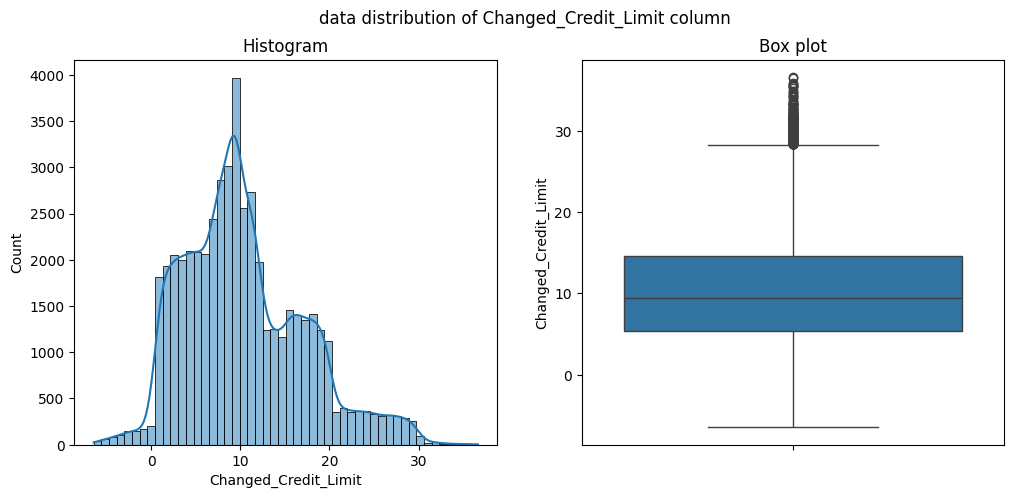

In [178]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Changed_Credit_Limit column")
sns.histplot(df.Changed_Credit_Limit,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Changed_Credit_Limit,ax=axs[1])
axs[1].set_title("Box plot")
# axs[1].set_yscale("log")


plt.show()


In [179]:
Changed_Credit_Limit_l,Changed_Credit_Limit_u = calculate_IQR("Changed_Credit_Limit")
print(Changed_Credit_Limit_l,Changed_Credit_Limit_u)

-8.3 28.34


In [180]:
df.loc[(df.Changed_Credit_Limit > Changed_Credit_Limit_u),"Changed_Credit_Limit"] = df.Changed_Credit_Limit.median()
df.Changed_Credit_Limit.dtype

dtype('float64')

In [181]:
df.Changed_Credit_Limit.describe()

count    50000.000000
mean        10.101752
std          6.347968
min         -6.450000
25%          5.440000
50%          9.410000
75%         14.140000
max         28.320000
Name: Changed_Credit_Limit, dtype: float64

In [182]:
df_new["Changed_Credit_Limit"] = df.Changed_Credit_Limit

In [183]:
df_new[30:35]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,Home Equity Loan,Credit-Builder Loan,Mortgage Loan,Student Loan,Payday Loan,Personal Loan,Num_of_Loan_Types,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit
30,31,Media_Manager,34081.38,2611.1150,8,7,15,3,0,1,0,0,0,1,0,0,2,29,15,17.13
31,31,Media_Manager,34081.38,2611.1150,8,7,15,3,0,1,0,0,0,1,0,0,2,30,14,17.13
32,24,Doctor,114838.41,9843.8675,2,5,7,3,1,1,0,0,0,0,0,1,3,11,12,8.24
33,24,Doctor,114838.41,9843.8675,2,5,7,3,1,1,0,0,0,0,0,1,3,11,9,9.41
34,34,Doctor,114838.41,3086.3050,2,5,7,3,1,1,0,0,0,0,0,1,3,11,8,8.24


In [184]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [185]:
# analysing Num_Credit_Inquiries column
df.Num_Credit_Inquiries.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Num_Credit_Inquiries
Non-Null Count  Dtype  
--------------  -----  
48965 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [186]:
df.Num_Credit_Inquiries.describe()

count    48965.000000
mean        30.080200
std        196.984121
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max       2593.000000
Name: Num_Credit_Inquiries, dtype: float64

In [187]:
# df.Num_Credit_Inquiries.fillna(df.Num_Credit_Inquiries.median(),inplace=True)
df.fillna({"Num_Credit_Inquiries":df.Num_Credit_Inquiries.median()},inplace=True)
df.Num_Credit_Inquiries.describe()

count    50000.000000
mean        29.602440
std        194.962329
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max       2593.000000
Name: Num_Credit_Inquiries, dtype: float64

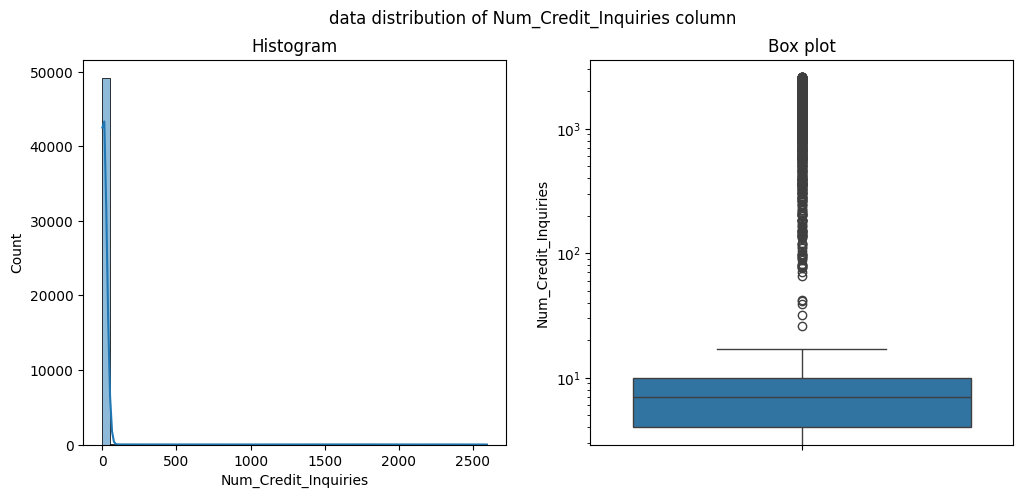

In [188]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Num_Credit_Inquiries column")
sns.histplot(df.Num_Credit_Inquiries,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Num_Credit_Inquiries,ax=axs[1])
axs[1].set_title("Box plot")
axs[1].set_yscale("log")


plt.show()


In [189]:
df.Num_Credit_Inquiries.median()

np.float64(7.0)

In [190]:
df.Num_Credit_Inquiries.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Num_Credit_Inquiries
Non-Null Count  Dtype  
--------------  -----  
50000 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [191]:
df_new["Num_Credit_Inquiries"] = df.Num_Credit_Inquiries.astype(int)

In [192]:
df_new[262:267]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Credit-Builder Loan,Mortgage Loan,Student Loan,Payday Loan,Personal Loan,Num_of_Loan_Types,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries
262,34,Unknown,75273.24,6424.022011,8,6,32,3,1,0,...,1,0,0,1,0,4,53,14,12.80,8
263,34,Musician,75273.24,6424.022011,8,6,32,5,1,0,...,1,0,0,1,0,4,50,9,9.41,8
264,34,Media_Manager,54820.89,3086.305000,8,7,28,6,1,0,...,0,1,0,0,1,4,41,17,9.41,11
265,34,Media_Manager,54820.89,4295.407500,8,7,28,6,1,0,...,0,1,0,0,1,4,41,17,18.42,7
266,19,Media_Manager,54820.89,4295.407500,8,7,28,6,1,0,...,0,1,0,0,1,4,41,17,20.42,11


In [193]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [194]:
df.Outstanding_Debt.info() #analysing Outstanding_Debt column

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Outstanding_Debt
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [195]:
df["Outstanding_Debt"] = pd.to_numeric(df.Outstanding_Debt,errors="coerce")
df.Outstanding_Debt.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Outstanding_Debt
Non-Null Count  Dtype  
--------------  -----  
49509 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [196]:
df.Outstanding_Debt.isnull().sum()

np.int64(491)

In [197]:
df.Outstanding_Debt.describe()

count    49509.000000
mean      1425.488588
std       1155.312552
min          0.230000
25%        565.340000
50%       1164.470000
75%       1943.210000
max       4998.070000
Name: Outstanding_Debt, dtype: float64

In [198]:
df.Outstanding_Debt.median()

np.float64(1164.47)

In [199]:
# df.Outstanding_Debt.fillna(df.Outstanding_Debt.median(),inplace=True)
df.fillna({"Outstanding_Debt":df.Outstanding_Debt.median()},inplace=True)
df.Outstanding_Debt.describe()

count    50000.000000
mean      1422.925385
std       1149.913954
min          0.230000
25%        570.510000
50%       1164.470000
75%       1931.120000
max       4998.070000
Name: Outstanding_Debt, dtype: float64

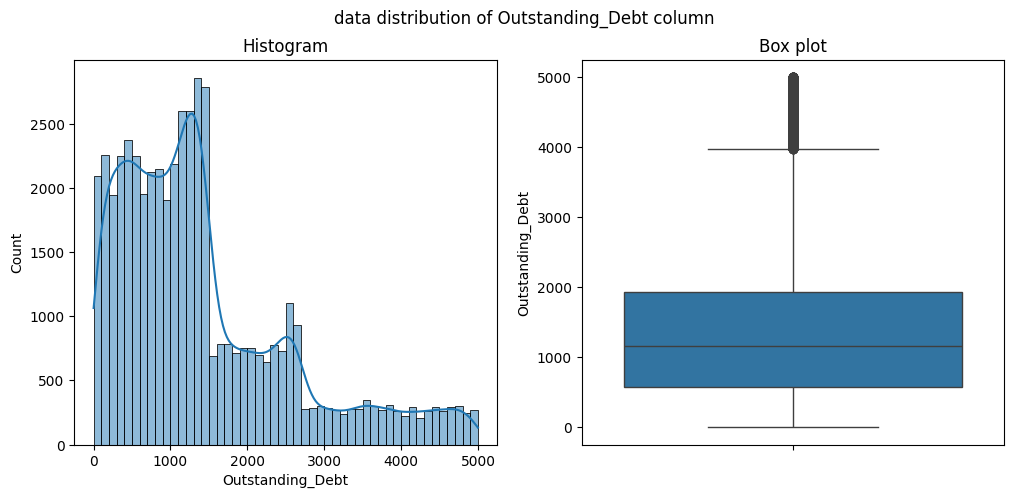

In [200]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Outstanding_Debt column")
sns.histplot(df.Outstanding_Debt,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Outstanding_Debt,ax=axs[1])
axs[1].set_title("Box plot")
# axs[1].set_yscale("log")


plt.show()


In [201]:
df.Outstanding_Debt[:20]

0      809.98
1      809.98
2      809.98
3      809.98
4      605.03
5      605.03
6      605.03
7      605.03
8     1303.01
9     1303.01
10    1164.47
11    1303.01
12     632.46
13     632.46
14     632.46
15     632.46
16     943.86
17     943.86
18     943.86
19     943.86
Name: Outstanding_Debt, dtype: float64

In [202]:
df.Outstanding_Debt.dtype

dtype('float64')

In [203]:
df_new["Outstanding_Debt"] = df.Outstanding_Debt

In [204]:
df_new[:10]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Mortgage Loan,Student Loan,Payday Loan,Personal Loan,Num_of_Loan_Types,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,0,0,0,1,4,3,7,11.27,2022,809.98
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,0,0,0,1,4,3,9,13.27,4,809.98
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,0,0,0,1,4,-1,4,12.27,4,809.98
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,...,0,0,0,1,4,4,5,11.27,4,809.98
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,...,0,0,0,0,1,3,1,5.42,5,605.03
5,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,0,0,0,0,1,3,3,5.42,5,605.03
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,0,0,0,0,1,3,14,5.42,5,605.03
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,0,0,0,0,1,3,14,7.42,5,605.03
8,35,Engineer,143162.64,3086.305000,1,5,8,3,0,1,...,0,0,0,0,1,8,14,7.10,3,1303.01
9,35,Engineer,143162.64,12187.220000,1,5,8,3,0,1,...,0,0,0,0,1,6,3,2.10,3,1303.01


In [205]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [206]:
df.Credit_Utilization_Ratio.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Credit_Utilization_Ratio
Non-Null Count  Dtype  
--------------  -----  
50000 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [207]:
df.Credit_Utilization_Ratio.describe()

count    50000.000000
mean        32.279581
std          5.106238
min         20.509652
25%         28.061040
50%         32.280390
75%         36.468591
max         48.540663
Name: Credit_Utilization_Ratio, dtype: float64

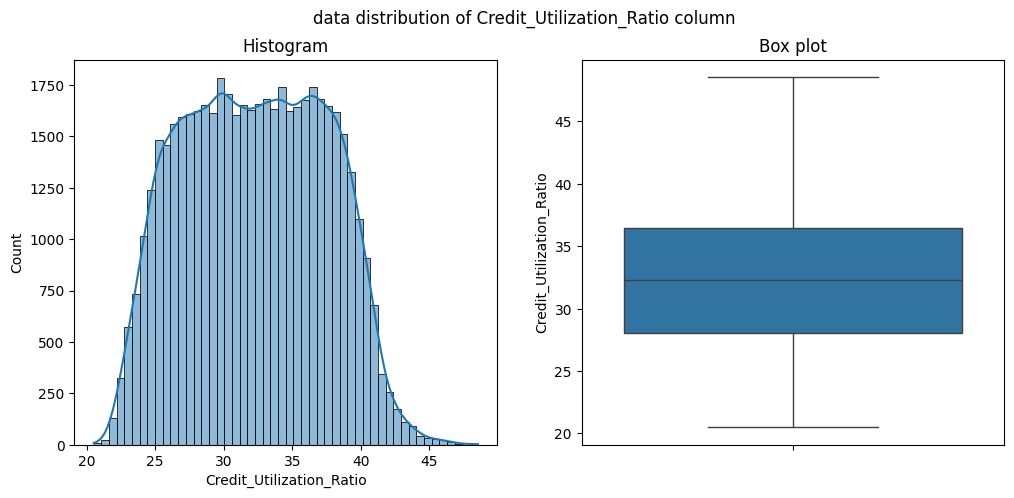

In [208]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Credit_Utilization_Ratio column")
sns.histplot(df.Credit_Utilization_Ratio,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Credit_Utilization_Ratio,ax=axs[1])
axs[1].set_title("Box plot")
# axs[1].set_yscale("log")


plt.show()


In [209]:
df_new["Credit_Utilization_Ratio"] = df.Credit_Utilization_Ratio
df_new[:10]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Student Loan,Payday Loan,Personal Loan,Num_of_Loan_Types,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,0,0,1,4,3,7,11.27,2022,809.98,35.030402
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,0,0,1,4,3,9,13.27,4,809.98,33.053114
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,0,0,1,4,-1,4,12.27,4,809.98,33.811894
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,...,0,0,1,4,4,5,11.27,4,809.98,32.430559
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,...,0,0,0,1,3,1,5.42,5,605.03,25.926822
5,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,0,0,0,1,3,3,5.42,5,605.03,30.116600
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,0,0,0,1,3,14,5.42,5,605.03,30.996424
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,0,0,0,1,3,14,7.42,5,605.03,33.875167
8,35,Engineer,143162.64,3086.305000,1,5,8,3,0,1,...,0,0,0,1,8,14,7.10,3,1303.01,35.229707
9,35,Engineer,143162.64,12187.220000,1,5,8,3,0,1,...,0,0,0,1,6,3,2.10,3,1303.01,35.685836


In [210]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [211]:
df.Credit_History_Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Credit_History_Age
Non-Null Count  Dtype 
--------------  ----- 
45530 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [212]:
df.Credit_History_Age.isnull().sum()

np.int64(4470)

In [213]:
df.Credit_History_Age.value_counts()[:20]

Credit_History_Age
20 Years and 1 Months    254
16 Years and 1 Months    254
18 Years and 7 Months    252
19 Years and 7 Months    252
18 Years and 6 Months    250
16 Years and 6 Months    248
19 Years and 1 Months    242
18 Years and 1 Months    241
16 Years and 7 Months    238
20 Years and 0 Months    236
19 Years and 6 Months    231
19 Years and 0 Months    230
18 Years and 0 Months    227
17 Years and 6 Months    227
17 Years and 1 Months    221
20 Years and 7 Months    218
16 Years and 0 Months    217
17 Years and 0 Months    214
17 Years and 7 Months    214
20 Years and 6 Months    212
Name: count, dtype: int64

In [214]:
df.Credit_History_Age.value_counts()[-20:]

Credit_History_Age
1 Years and 11 Months     32
3 Years and 4 Months      32
4 Years and 2 Months      32
4 Years and 3 Months      30
4 Years and 6 Months      29
4 Years and 10 Months     29
3 Years and 5 Months      29
4 Years and 8 Months      28
4 Years and 11 Months     27
1 Years and 2 Months      27
4 Years and 7 Months      26
3 Years and 3 Months      26
5 Years and 2 Months      25
1 Years and 4 Months      25
4 Years and 4 Months      22
4 Years and 5 Months      21
0 Years and 11 Months     16
33 Years and 11 Months    15
34 Years and 0 Months     14
0 Years and 10 Months     13
Name: count, dtype: int64

In [215]:
df.Credit_History_Age[:5]

0     22 Years and 9 Months
1    22 Years and 10 Months
2                       NaN
3     23 Years and 0 Months
4     27 Years and 3 Months
Name: Credit_History_Age, dtype: object

In [216]:
def age_to_month(x):
    if pd.isna(x):
        return None
    else:
        a = str(x)
        parts = a.split(" ")
        year = int(parts[0])
        month = int(parts[3])
        return year*12+month


In [217]:
df_new["Credit_History_Months"] = df.Credit_History_Age.apply(age_to_month)

In [218]:
df_new.Credit_History_Months[11:19]

11      NaN
12    215.0
13    216.0
14    217.0
15    218.0
16    376.0
17    377.0
18      NaN
Name: Credit_History_Months, dtype: float64

In [219]:
df_new.Credit_History_Months.describe()

count    45530.000000
mean       227.251175
std         99.554366
min         10.000000
25%        151.000000
50%        225.000000
75%        307.000000
max        408.000000
Name: Credit_History_Months, dtype: float64

In [220]:
df_new.Credit_History_Months.median()

np.float64(225.0)

In [221]:
# df_new.Credit_History_Months.fillna(df_new.Credit_History_Months.median(),inplace=True)
df_new.fillna({"Credit_History_Months":df_new.Credit_History_Months.median()},inplace=True)
df_new.Credit_History_Months[11:19]

11    225.0
12    215.0
13    216.0
14    217.0
15    218.0
16    376.0
17    377.0
18    225.0
Name: Credit_History_Months, dtype: float64

In [222]:
df_new.Credit_History_Months.isnull().sum()

np.int64(0)

In [223]:
df_new.Credit_History_Months.dtype

dtype('float64')

In [224]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [225]:
df.Payment_of_Min_Amount.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Payment_of_Min_Amount
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [226]:
df.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    26158
No     17849
NM      5993
Name: count, dtype: int64

In [227]:
df_new["Payment_of_Min_Amount"] = df.Payment_of_Min_Amount

In [228]:
df_new

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Personal Loan,Num_of_Loan_Types,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,1,4,3,7,11.27,2022,809.98,35.030402,273.0,No
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,1,4,3,9,13.27,4,809.98,33.053114,274.0,No
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,1,4,-1,4,12.27,4,809.98,33.811894,225.0,No
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,...,1,4,4,5,11.27,4,809.98,32.430559,276.0,No
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,...,0,1,3,1,5.42,5,605.03,25.926822,327.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,34,Architect,20002.88,1929.906667,10,8,29,5,0,1,...,1,4,33,25,18.31,12,3571.70,34.780553,225.0,Yes
49996,25,Mechanic,39628.99,3086.305000,4,6,7,3,0,1,...,0,2,20,14,11.50,7,502.38,27.758522,383.0,NM
49997,25,Mechanic,39628.99,3359.415833,4,6,7,2,0,1,...,0,2,23,5,13.50,7,502.38,36.858542,384.0,No
49998,25,Mechanic,39628.99,3086.305000,4,6,7,3,0,1,...,0,2,21,14,11.50,7,502.38,39.139840,385.0,No


In [229]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [230]:
df.Total_EMI_per_month.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Total_EMI_per_month
Non-Null Count  Dtype  
--------------  -----  
50000 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [231]:
df.Total_EMI_per_month.describe()

count    50000.000000
mean      1491.304305
std       8595.647887
min          0.000000
25%         32.222388
50%         74.733349
75%        176.157491
max      82398.000000
Name: Total_EMI_per_month, dtype: float64

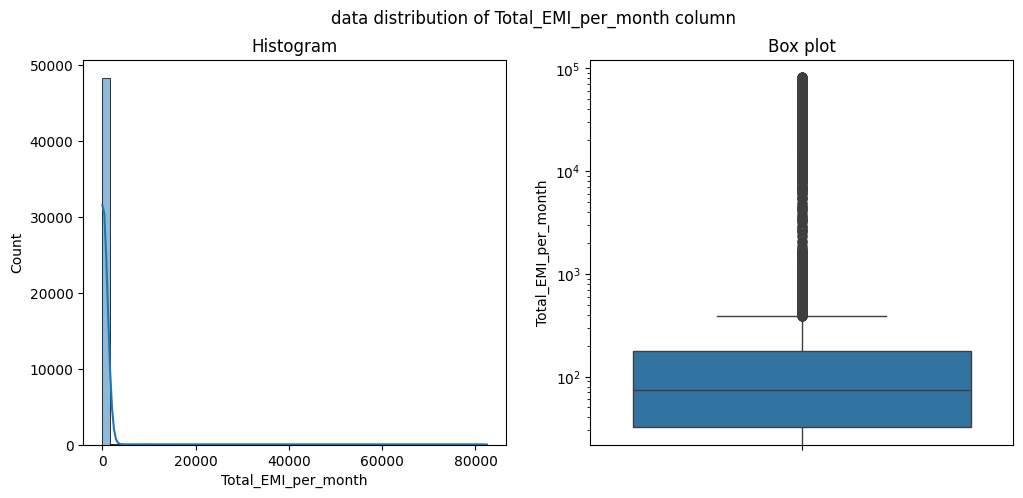

In [232]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Total_EMI_per_month column")
sns.histplot(df.Total_EMI_per_month,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Total_EMI_per_month,ax=axs[1])
axs[1].set_title("Box plot")
axs[1].set_yscale("log")


plt.show()


In [233]:
Total_EMI_per_month_l,Total_EMI_per_month_u = calculate_IQR("Total_EMI_per_month")
print(Total_EMI_per_month_l,Total_EMI_per_month_u)

-183.68026793459745 392.0601470000057


In [234]:
df.Total_EMI_per_month.median()

np.float64(74.73334890870491)

In [235]:
df.loc[(df.Total_EMI_per_month>300)&(df.Total_EMI_per_month<400),"Total_EMI_per_month"]

172      364.915177
173      364.915177
174      364.915177
175      364.915177
180      314.901785
            ...    
49803    312.032853
49976    362.072453
49977    362.072453
49978    362.072453
49979    362.072453
Name: Total_EMI_per_month, Length: 1966, dtype: float64

In [236]:
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].clip(upper=Total_EMI_per_month_u)

In [237]:
df.Total_EMI_per_month.describe()

count    50000.000000
mean       119.577432
std        116.988671
min          0.000000
25%         32.222388
50%         74.733349
75%        176.157491
max        392.060147
Name: Total_EMI_per_month, dtype: float64

In [238]:
df_new['Total_EMI_per_month'] = df.Total_EMI_per_month

In [239]:
df_new[:10]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Num_of_Loan_Types,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount,Total_EMI_per_month
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,4,3,7,11.27,2022,809.98,35.030402,273.0,No,49.574949
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,4,3,9,13.27,4,809.98,33.053114,274.0,No,49.574949
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,4,-1,4,12.27,4,809.98,33.811894,225.0,No,49.574949
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,...,4,4,5,11.27,4,809.98,32.430559,276.0,No,49.574949
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,...,1,3,1,5.42,5,605.03,25.926822,327.0,No,18.816215
5,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,1,3,3,5.42,5,605.03,30.116600,328.0,No,18.816215
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,1,3,14,5.42,5,605.03,30.996424,329.0,No,18.816215
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,1,3,14,7.42,5,605.03,33.875167,330.0,No,18.816215
8,35,Engineer,143162.64,3086.305000,1,5,8,3,0,1,...,1,8,14,7.10,3,1303.01,35.229707,221.0,No,246.992319
9,35,Engineer,143162.64,12187.220000,1,5,8,3,0,1,...,1,6,3,2.10,3,1303.01,35.685836,222.0,No,246.992319


In [240]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [241]:
df.Amount_invested_monthly.info() # analysing Amount_invested_monthly column

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Amount_invested_monthly
Non-Null Count  Dtype 
--------------  ----- 
47729 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [242]:
df.Amount_invested_monthly[58:65]

58             __10000__
59    141.04976298055809
60     23.27102220438635
61     167.8831859201672
62             __10000__
63     86.03296639485399
64     629.4070206862149
Name: Amount_invested_monthly, dtype: object

In [243]:
df["Amount_invested_monthly"] = pd.to_numeric(df.Amount_invested_monthly,errors="coerce")
df.Amount_invested_monthly[58:65]

58           NaN
59    141.049763
60     23.271022
61    167.883186
62           NaN
63     86.032966
64    629.407021
Name: Amount_invested_monthly, dtype: float64

In [244]:
df.Amount_invested_monthly.isnull().sum()

np.int64(4446)

In [245]:
df.Amount_invested_monthly.describe()

count    45554.000000
mean       194.835617
std        196.654604
min          0.000000
25%         72.212975
50%        129.032119
75%        236.867011
max       1908.124400
Name: Amount_invested_monthly, dtype: float64

In [246]:
df.Amount_invested_monthly.median()

np.float64(129.03211871429977)

In [247]:
# df.Amount_invested_monthly.fillna(df.Amount_invested_monthly.median(),inplace=True)
df.fillna({"Amount_invested_monthly":df.Amount_invested_monthly.median()},inplace=True)
df.Amount_invested_monthly.describe()

count    50000.000000
mean       188.984370
std        188.639765
min          0.000000
25%         77.031011
50%        129.032119
75%        220.559195
max       1908.124400
Name: Amount_invested_monthly, dtype: float64

In [248]:
df.Amount_invested_monthly.dtype

dtype('float64')

In [249]:
df_new["Amount_invested_monthly"] = df.Amount_invested_monthly
df_new[:10]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,3,7,11.27,2022,809.98,35.030402,273.0,No,49.574949,236.642682
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,3,9,13.27,4,809.98,33.053114,274.0,No,49.574949,21.465380
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,-1,4,12.27,4,809.98,33.811894,225.0,No,49.574949,148.233938
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,...,4,5,11.27,4,809.98,32.430559,276.0,No,49.574949,39.082511
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,...,3,1,5.42,5,605.03,25.926822,327.0,No,18.816215,39.684018
5,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,3,3,5.42,5,605.03,30.116600,328.0,No,18.816215,251.627369
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,3,14,5.42,5,605.03,30.996424,329.0,No,18.816215,72.680145
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,3,14,7.42,5,605.03,33.875167,330.0,No,18.816215,153.534488
8,35,Engineer,143162.64,3086.305000,1,5,8,3,0,1,...,8,14,7.10,3,1303.01,35.229707,221.0,No,246.992319,397.503654
9,35,Engineer,143162.64,12187.220000,1,5,8,3,0,1,...,6,3,2.10,3,1303.01,35.685836,222.0,No,246.992319,453.615131


In [250]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [251]:
df.Payment_Behaviour.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Payment_Behaviour
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [252]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
!@9#%8                               3800
Name: count, dtype: int64

In [253]:
df["Payment_Behaviour"] = df.Payment_Behaviour.replace("!@9#%8","Unknown")

In [254]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
Unknown                              3800
Name: count, dtype: int64

In [255]:
df.Payment_Behaviour.isnull().sum()

np.int64(0)

In [256]:
def Payment_Behaviour_level_size(x):
    if x=="Unknown":
        return pd.Series(["Unknown","Unknown"])
    else:
        a = str(x)
        parts = a.split("_")
        level = parts[0]
        size = parts[2]
        return pd.Series([level,size])

In [257]:
df_new[["Payment_Behaviour_lavel","Payment_Behaviour_size"]] = df.Payment_Behaviour.apply(Payment_Behaviour_level_size)

In [258]:
df_new[:10]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_lavel,Payment_Behaviour_size
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,11.27,2022,809.98,35.030402,273.0,No,49.574949,236.642682,Low,Small
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,13.27,4,809.98,33.053114,274.0,No,49.574949,21.465380,High,Medium
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,12.27,4,809.98,33.811894,225.0,No,49.574949,148.233938,Low,Medium
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,...,11.27,4,809.98,32.430559,276.0,No,49.574949,39.082511,High,Medium
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,...,5.42,5,605.03,25.926822,327.0,No,18.816215,39.684018,High,Large
5,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,5.42,5,605.03,30.116600,328.0,No,18.816215,251.627369,Low,Large
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,5.42,5,605.03,30.996424,329.0,No,18.816215,72.680145,High,Large
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,7.42,5,605.03,33.875167,330.0,No,18.816215,153.534488,Unknown,Unknown
8,35,Engineer,143162.64,3086.305000,1,5,8,3,0,1,...,7.10,3,1303.01,35.229707,221.0,No,246.992319,397.503654,Low,Medium
9,35,Engineer,143162.64,12187.220000,1,5,8,3,0,1,...,2.10,3,1303.01,35.685836,222.0,No,246.992319,453.615131,Low,Large


In [259]:
df_new.Payment_Behaviour_lavel.value_counts()

Payment_Behaviour_lavel
Low        24783
High       21417
Unknown     3800
Name: count, dtype: int64

In [260]:
df_new.Payment_Behaviour_size.value_counts()

Payment_Behaviour_size
Small      18345
Medium     15759
Large      12096
Unknown     3800
Name: count, dtype: int64

In [261]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [262]:
df.Monthly_Balance.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Monthly_Balance
Non-Null Count  Dtype 
--------------  ----- 
49438 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [263]:
df.Monthly_Balance.isnull().sum()

np.int64(562)

In [264]:
df["Monthly_Balance"] = pd.to_numeric(df.Monthly_Balance,errors="coerce")


In [265]:
df.Monthly_Balance.describe()

count    49432.000000
mean       403.066257
std        213.685108
min          0.103402
25%        270.498156
50%        336.984582
75%        470.867640
max       1606.518192
Name: Monthly_Balance, dtype: float64

In [266]:
# df.Monthly_Balance.fillna(df.Monthly_Balance.median(),inplace=True)
df.fillna({"Monthly_Balance":df.Monthly_Balance.median()},inplace=True)

In [267]:
df.Monthly_Balance.isnull().sum()

np.int64(0)

In [268]:
df.Monthly_Balance.describe()

count    50000.000000
mean       402.315569
std        212.583269
min          0.103402
25%        271.118562
50%        336.984582
75%        468.571215
max       1606.518192
Name: Monthly_Balance, dtype: float64

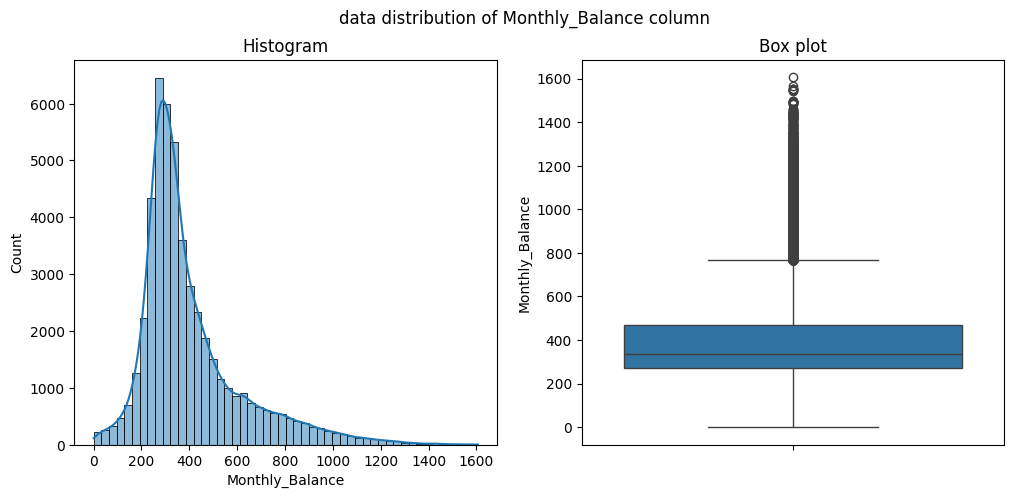

In [269]:

fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("data distribution of Monthly_Balance column")
sns.histplot(df.Monthly_Balance,bins=50,kde=True,ax=axs[0])
axs[0].set_title("Histogram")

sns.boxplot(y=df.Monthly_Balance,ax=axs[1])
axs[1].set_title("Box plot")
# axs[1].set_yscale("log")


plt.show()


In [270]:
df_new["Monthly_Balance"] = df.Monthly_Balance

In [271]:
df_new[:10]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_lavel,Payment_Behaviour_size,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,2022,809.98,35.030402,273.0,No,49.574949,236.642682,Low,Small,186.266702
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,4,809.98,33.053114,274.0,No,49.574949,21.465380,High,Medium,361.444004
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,4,809.98,33.811894,225.0,No,49.574949,148.233938,Low,Medium,264.675446
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,...,4,809.98,32.430559,276.0,No,49.574949,39.082511,High,Medium,343.826873
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,...,5,605.03,25.926822,327.0,No,18.816215,39.684018,High,Large,485.298434
5,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,5,605.03,30.116600,328.0,No,18.816215,251.627369,Low,Large,303.355083
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,5,605.03,30.996424,329.0,No,18.816215,72.680145,High,Large,452.302307
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,5,605.03,33.875167,330.0,No,18.816215,153.534488,Unknown,Unknown,421.447964
8,35,Engineer,143162.64,3086.305000,1,5,8,3,0,1,...,3,1303.01,35.229707,221.0,No,246.992319,397.503654,Low,Medium,854.226027
9,35,Engineer,143162.64,12187.220000,1,5,8,3,0,1,...,3,1303.01,35.685836,222.0,No,246.992319,453.615131,Low,Large,788.114550


In [272]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [273]:
df.Credit_Mix.info() # analysing target column

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Credit_Mix
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [274]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    18379
Good        12260
_            9805
Bad          9556
Name: count, dtype: int64

In [275]:
df.Credit_Mix[5:9]

5    Good
6       _
7       _
8    Good
Name: Credit_Mix, dtype: object

##### fill the missing labels using Random Forest ML model
##### predicting the 9805 Unknown rows to get whether thsy are Standard or good or bad

In [276]:
df_new.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Debt Consolidation Loan', 'Auto Loan', 'Home Equity Loan',
       'Credit-Builder Loan', 'Mortgage Loan', 'Student Loan', 'Payday Loan',
       'Personal Loan', 'Num_of_Loan_Types', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Months', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour_lavel',
       'Payment_Behaviour_size', 'Monthly_Balance'],
      dtype='object')

In [277]:
df_new["Credit_Mix"] = df.Credit_Mix

In [278]:
df_new.shape

(50000, 31)

In [279]:
df_new.Credit_Mix[5:9]

5    Good
6       _
7       _
8    Good
Name: Credit_Mix, dtype: object

In [280]:
df_new.Credit_Mix.value_counts()

Credit_Mix
Standard    18379
Good        12260
_            9805
Bad          9556
Name: count, dtype: int64

In [281]:
df_new["Credit_Mix"] = df_new.Credit_Mix.replace("_",np.nan)
df_new.Credit_Mix[5:9]

5    Good
6     NaN
7     NaN
8    Good
Name: Credit_Mix, dtype: object

In [282]:
df_new.Credit_Mix.value_counts()

Credit_Mix
Standard    18379
Good        12260
Bad          9556
Name: count, dtype: int64

In [283]:
df_new.Credit_Mix.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Credit_Mix
Non-Null Count  Dtype 
--------------  ----- 
40195 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [284]:
df_new.Credit_Mix.isnull().sum()

np.int64(9805)

In [285]:
# spliting labeled and unlabeled rows
df_labeled = df_new[df_new.Credit_Mix.notna()]
df_unlabeled = df_new[df_new.Credit_Mix.isna()]

In [286]:
df_labeled

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_lavel,Payment_Behaviour_size,Monthly_Balance,Credit_Mix
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,809.98,35.030402,273.0,No,49.574949,236.642682,Low,Small,186.266702,Good
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,809.98,33.053114,274.0,No,49.574949,21.465380,High,Medium,361.444004,Good
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,809.98,33.811894,225.0,No,49.574949,148.233938,Low,Medium,264.675446,Good
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,...,809.98,32.430559,276.0,No,49.574949,39.082511,High,Medium,343.826873,Good
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,25.926822,327.0,No,18.816215,39.684018,High,Large,485.298434,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,29,Architect,20002.88,1929.906667,10,8,29,5,0,1,...,3571.70,37.528511,77.0,Yes,60.964772,71.794421,Low,Small,350.231473,Bad
49994,29,Unknown,20002.88,1929.906667,10,8,29,5,0,1,...,3571.70,27.027812,78.0,Yes,60.964772,50.846847,High,Small,341.179047,Bad
49996,25,Mechanic,39628.99,3086.305000,4,6,7,3,0,1,...,502.38,27.758522,383.0,NM,35.104023,181.442999,Low,Small,409.394562,Good
49997,25,Mechanic,39628.99,3359.415833,4,6,7,2,0,1,...,502.38,36.858542,384.0,No,35.104023,129.032119,Low,Large,349.726332,Good


In [287]:
df_labeled.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Debt Consolidation Loan     0
Auto Loan                   0
Home Equity Loan            0
Credit-Builder Loan         0
Mortgage Loan               0
Student Loan                0
Payday Loan                 0
Personal Loan               0
Num_of_Loan_Types           0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Months       0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour_lavel     0
Payment_Behaviour_size      0
Monthly_Balance             0
Credit_Mix                  0
dtype: int64

In [288]:
df_unlabeled

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_lavel,Payment_Behaviour_size,Monthly_Balance,Credit_Mix
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,30.996424,329.0,No,18.816215,72.680145,High,Large,452.302307,NaN
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,33.875167,330.0,No,18.816215,153.534488,Unknown,Unknown,421.447964,NaN
13,55,Entrepreneur,30689.89,2612.490833,2,5,4,3,0,0,...,632.46,36.280475,216.0,No,16.415452,29.393311,High,Large,455.440320,NaN
16,22,Developer,35547.71,2853.309167,7,5,5,0,0,0,...,943.86,34.729842,376.0,Yes,0.000000,59.366058,High,Medium,475.964859,NaN
22,34,Lawyer,73928.46,5988.705000,4,5,8,0,0,0,...,548.20,31.291849,393.0,No,0.000000,105.748063,High,Large,733.122437,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,19,Lawyer,42903.79,3086.305000,0,4,6,1,0,0,...,1079.48,33.086814,348.0,No,34.975457,256.309922,Low,Large,325.546205,NaN
49987,45,Media_Manager,16680.35,3086.305000,1,1,5,4,0,0,...,897.16,25.793227,264.0,NM,41.113561,40.893052,Low,Large,340.796304,NaN
49991,34,Writer,37188.10,3097.008333,1,4,5,3,0,0,...,620.64,36.498383,368.0,No,392.060147,238.399383,Low,Large,257.095501,NaN
49995,34,Architect,20002.88,1929.906667,10,8,29,5,0,1,...,3571.70,34.780553,225.0,Yes,60.964772,146.486325,Low,Small,275.539570,NaN


In [289]:
df_unlabeled.isnull().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Debt Consolidation Loan        0
Auto Loan                      0
Home Equity Loan               0
Credit-Builder Loan            0
Mortgage Loan                  0
Student Loan                   0
Payday Loan                    0
Personal Loan                  0
Num_of_Loan_Types              0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Months          0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour_lavel        0
Payment_Behaviour_size         0
Monthly_Balance                0
Credit_Mix

In [290]:
# Train-test split on labeled data
from sklearn.model_selection import train_test_split


In [291]:
x_labeled = df_labeled.drop("Credit_Mix",axis=1)
y_labeled = df_labeled.Credit_Mix

In [292]:
df_new.shape

(50000, 31)

In [293]:
x_labeled.shape

(40195, 30)

In [294]:
y_labeled.shape

(40195,)

In [295]:
y_labeled.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Credit_Mix, dtype: object

In [296]:
xtrain_labeled, xtest_labeled, ytrain_labeled, ytest_labeled = train_test_split(x_labeled,y_labeled,test_size=0.10,random_state=42)

In [297]:
print(xtrain_labeled.shape,ytrain_labeled.shape)
print(xtest_labeled.shape,ytest_labeled.shape)

(36175, 30) (36175,)
(4020, 30) (4020,)


In [298]:
from pandas.api.types import is_numeric_dtype

In [299]:
numeric_columns = [col for col in xtrain_labeled.columns if is_numeric_dtype(xtrain_labeled[col])]
numeric_columns

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Debt Consolidation Loan',
 'Auto Loan',
 'Home Equity Loan',
 'Credit-Builder Loan',
 'Mortgage Loan',
 'Student Loan',
 'Payday Loan',
 'Personal Loan',
 'Num_of_Loan_Types',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Months',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [300]:
categorical_columns = [col for col in xtrain_labeled.columns if not is_numeric_dtype(xtrain_labeled[col])]
categorical_columns

['Occupation',
 'Payment_of_Min_Amount',
 'Payment_Behaviour_lavel',
 'Payment_Behaviour_size']

In [301]:
# df_new.to_csv("df_new.csv")

In [302]:
ytrain_labeled.value_counts()

Credit_Mix
Standard    16511
Good        11069
Bad          8595
Name: count, dtype: int64

In [303]:
from sklearn.preprocessing import LabelEncoder

In [304]:
le = LabelEncoder()
ytrain_labeled = le.fit_transform(ytrain_labeled)
ytest_labeled = le.transform(ytest_labeled)

In [305]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [306]:
preprocessor = ColumnTransformer(transformers=[
    ("ordinal_encoding",OrdinalEncoder(),categorical_columns)
],
remainder="passthrough"
)

In [307]:
from sklearn.ensemble import RandomForestClassifier

In [308]:
clf = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("Model",RandomForestClassifier(
        n_estimators=600,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features="sqrt",
        bootstrap=True,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    ))
])

In [309]:
clf.fit(xtrain_labeled,ytrain_labeled)

,steps,"[('preprocessor', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ordinal_encoding', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [310]:
predict_values = clf.predict(xtest_labeled)

In [311]:
predict_values

array([0, 0, 0, ..., 2, 1, 0], shape=(4020,))

In [312]:
clf.score(xtest_labeled,ytest_labeled) # 0.963681592039801

0.9641791044776119

In [313]:
le.inverse_transform(predict_values) # Bad = 0, Standard = 2, Good = 1

array(['Bad', 'Bad', 'Bad', ..., 'Standard', 'Good', 'Bad'],
      shape=(4020,), dtype=object)

In [314]:
df_unlabeled

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_lavel,Payment_Behaviour_size,Monthly_Balance,Credit_Mix
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,30.996424,329.0,No,18.816215,72.680145,High,Large,452.302307,NaN
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,33.875167,330.0,No,18.816215,153.534488,Unknown,Unknown,421.447964,NaN
13,55,Entrepreneur,30689.89,2612.490833,2,5,4,3,0,0,...,632.46,36.280475,216.0,No,16.415452,29.393311,High,Large,455.440320,NaN
16,22,Developer,35547.71,2853.309167,7,5,5,0,0,0,...,943.86,34.729842,376.0,Yes,0.000000,59.366058,High,Medium,475.964859,NaN
22,34,Lawyer,73928.46,5988.705000,4,5,8,0,0,0,...,548.20,31.291849,393.0,No,0.000000,105.748063,High,Large,733.122437,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,19,Lawyer,42903.79,3086.305000,0,4,6,1,0,0,...,1079.48,33.086814,348.0,No,34.975457,256.309922,Low,Large,325.546205,NaN
49987,45,Media_Manager,16680.35,3086.305000,1,1,5,4,0,0,...,897.16,25.793227,264.0,NM,41.113561,40.893052,Low,Large,340.796304,NaN
49991,34,Writer,37188.10,3097.008333,1,4,5,3,0,0,...,620.64,36.498383,368.0,No,392.060147,238.399383,Low,Large,257.095501,NaN
49995,34,Architect,20002.88,1929.906667,10,8,29,5,0,1,...,3571.70,34.780553,225.0,Yes,60.964772,146.486325,Low,Small,275.539570,NaN


In [315]:
x_unlabeled = df_unlabeled.drop("Credit_Mix",axis=1)

In [316]:
x_unlabeled.shape

(9805, 30)

In [317]:
x_unlabeled["Credit_Mix_pre"] = clf.predict(x_unlabeled)

In [318]:
x_unlabeled.Credit_Mix_pre

6        1
7        1
13       1
16       2
22       1
        ..
49983    1
49987    1
49991    1
49995    0
49999    1
Name: Credit_Mix_pre, Length: 9805, dtype: int64

In [319]:
re_transformed_Credit_mix = le.inverse_transform(x_unlabeled.Credit_Mix_pre)
re_transformed_Credit_mix

array(['Good', 'Good', 'Good', ..., 'Good', 'Bad', 'Good'],
      shape=(9805,), dtype=object)

In [320]:
df_unlabeled["Credit_Mix"] = re_transformed_Credit_mix

C:\Users\ShahriarHA\AppData\Local\Temp\ipykernel_3500\1192976108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabeled["Credit_Mix"] = re_transformed_Credit_mix


In [321]:
df_unlabeled

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_lavel,Payment_Behaviour_size,Monthly_Balance,Credit_Mix
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,30.996424,329.0,No,18.816215,72.680145,High,Large,452.302307,Good
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,33.875167,330.0,No,18.816215,153.534488,Unknown,Unknown,421.447964,Good
13,55,Entrepreneur,30689.89,2612.490833,2,5,4,3,0,0,...,632.46,36.280475,216.0,No,16.415452,29.393311,High,Large,455.440320,Good
16,22,Developer,35547.71,2853.309167,7,5,5,0,0,0,...,943.86,34.729842,376.0,Yes,0.000000,59.366058,High,Medium,475.964859,Standard
22,34,Lawyer,73928.46,5988.705000,4,5,8,0,0,0,...,548.20,31.291849,393.0,No,0.000000,105.748063,High,Large,733.122437,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,19,Lawyer,42903.79,3086.305000,0,4,6,1,0,0,...,1079.48,33.086814,348.0,No,34.975457,256.309922,Low,Large,325.546205,Good
49987,45,Media_Manager,16680.35,3086.305000,1,1,5,4,0,0,...,897.16,25.793227,264.0,NM,41.113561,40.893052,Low,Large,340.796304,Good
49991,34,Writer,37188.10,3097.008333,1,4,5,3,0,0,...,620.64,36.498383,368.0,No,392.060147,238.399383,Low,Large,257.095501,Good
49995,34,Architect,20002.88,1929.906667,10,8,29,5,0,1,...,3571.70,34.780553,225.0,Yes,60.964772,146.486325,Low,Small,275.539570,Bad


In [322]:
df_unlabeled.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Debt Consolidation Loan     0
Auto Loan                   0
Home Equity Loan            0
Credit-Builder Loan         0
Mortgage Loan               0
Student Loan                0
Payday Loan                 0
Personal Loan               0
Num_of_Loan_Types           0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Months       0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour_lavel     0
Payment_Behaviour_size      0
Monthly_Balance             0
Credit_Mix                  0
dtype: int64

In [323]:
df_unlabeled.Credit_Mix.isnull().sum()

np.int64(0)

In [324]:
df_labeled.Credit_Mix

0        Good
1        Good
2        Good
3        Good
4        Good
         ... 
49993     Bad
49994     Bad
49996    Good
49997    Good
49998    Good
Name: Credit_Mix, Length: 40195, dtype: object

In [325]:
df_unlabeled.Credit_Mix

6            Good
7            Good
13           Good
16       Standard
22           Good
           ...   
49983        Good
49987        Good
49991        Good
49995         Bad
49999        Good
Name: Credit_Mix, Length: 9805, dtype: object

In [326]:
df_labeled.shape

(40195, 31)

In [327]:
df_unlabeled.shape

(9805, 31)

In [328]:
df_final_cleaned1 = pd.concat([df_labeled, df_unlabeled])

In [329]:
# df_final_cleaned1.to_csv("Cleaned_CreditMix_dataset_1.csv")

In [330]:
# cleaned_df = pd.read_csv("Cleaned_CreditMix_dataset_1.csv")

In [331]:
df_final_cleaned2 = pd.concat([df_labeled, df_unlabeled]).sort_index()

In [332]:
df_final_cleaned2[:10]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Auto Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_lavel,Payment_Behaviour_size,Monthly_Balance,Credit_Mix
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,809.98,35.030402,273.0,No,49.574949,236.642682,Low,Small,186.266702,Good
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,809.98,33.053114,274.0,No,49.574949,21.465380,High,Medium,361.444004,Good
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,809.98,33.811894,225.0,No,49.574949,148.233938,Low,Medium,264.675446,Good
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,...,809.98,32.430559,276.0,No,49.574949,39.082511,High,Medium,343.826873,Good
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,25.926822,327.0,No,18.816215,39.684018,High,Large,485.298434,Good
5,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,30.116600,328.0,No,18.816215,251.627369,Low,Large,303.355083,Good
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,30.996424,329.0,No,18.816215,72.680145,High,Large,452.302307,Good
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,33.875167,330.0,No,18.816215,153.534488,Unknown,Unknown,421.447964,Good
8,35,Engineer,143162.64,3086.305000,1,5,8,3,0,1,...,1303.01,35.229707,221.0,No,246.992319,397.503654,Low,Medium,854.226027,Good
9,35,Engineer,143162.64,12187.220000,1,5,8,3,0,1,...,1303.01,35.685836,222.0,No,246.992319,453.615131,Low,Large,788.114550,Good


In [333]:
# df_final_cleaned2.to_csv("Cleaned_CreditMix_dataset_2.csv")

In [334]:
clf.score(xtrain_labeled,ytrain_labeled)

0.9921216309606081

In [335]:
test_res = pd.DataFrame({
    "Data_Set":["Training_set","Test_set"],
    "Score": [round(clf.score(xtrain_labeled,ytrain_labeled)*100,2),round(clf.score(xtest_labeled,ytest_labeled)*100,2)]
})
test_res

,Data_Set,Score
0,Training_set,99.21
1,Test_set,96.42


Text(0.5, 1.0, 'RandomForest prediction results for NaN values in Credit_Mix.')

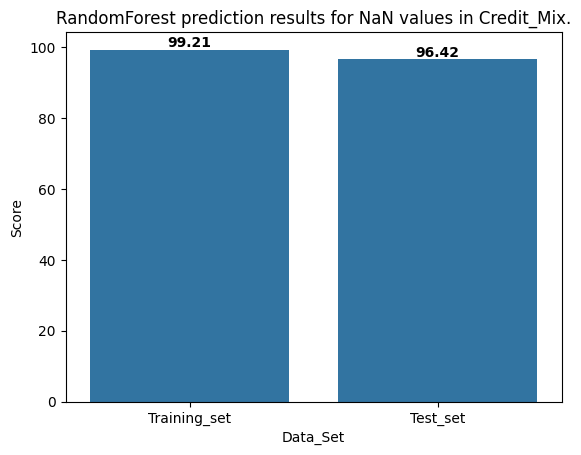

In [336]:
a = sns.barplot(x=test_res.Data_Set,y=test_res.Score)
for con in a.containers:
    a.bar_label(con,label_type='edge',weight="bold")
plt.title("RandomForest prediction results for NaN values in Credit_Mix.")

## 2. Exploratory Data Analysis (EDA)
- Perform descriptive statistics to understand the data distribution.
- Visualize relationships between features and the target variable.
- Analyze correlations and identify trends or anomalies in the data.

In [337]:
dataFrame = pd.read_csv("Cleaned_CreditMix_dataset_2.csv",index_col=0)

In [338]:
dataFrame[:10]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Debt Consolidation Loan,Home Equity Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_lavel,Payment_Behaviour_size,Monthly_Balance,Credit_Mix
0,23,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,809.98,35.030402,273.0,No,49.574949,236.642682,Low,Small,186.266702,Good
1,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,809.98,33.053114,274.0,No,49.574949,21.465380,High,Medium,361.444004,Good
2,24,Scientist,19114.12,1824.843333,3,4,3,4,0,1,...,809.98,33.811894,225.0,No,49.574949,148.233938,Low,Medium,264.675446,Good
3,34,Scientist,19114.12,3086.305000,3,4,3,4,0,1,...,809.98,32.430559,276.0,No,49.574949,39.082511,High,Medium,343.826873,Good
4,28,Unknown,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,25.926822,327.0,No,18.816215,39.684018,High,Large,485.298434,Good
5,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,30.116600,328.0,No,18.816215,251.627369,Low,Large,303.355083,Good
6,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,30.996424,329.0,No,18.816215,72.680145,High,Large,452.302307,Good
7,28,Teacher,34847.84,3037.986667,2,4,6,1,0,0,...,605.03,33.875167,330.0,No,18.816215,153.534488,Unknown,Unknown,421.447964,Good
8,35,Engineer,143162.64,3086.305000,1,5,8,3,0,0,...,1303.01,35.229707,221.0,No,246.992319,397.503654,Low,Medium,854.226027,Good
9,35,Engineer,143162.64,12187.220000,1,5,8,3,0,0,...,1303.01,35.685836,222.0,No,246.992319,453.615131,Low,Large,788.114550,Good


In [339]:
dataFrame.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Student Loan',
       'Payday Loan', 'Personal Loan', 'Auto Loan', 'Mortgage Loan',
       'Credit-Builder Loan', 'Num_of_Loan_Types', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Months', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour_lavel',
       'Payment_Behaviour_size', 'Monthly_Balance', 'Credit_Mix'],
      dtype='object')

In [340]:
dataFrame.rename(columns={
    'Debt Consolidation Loan': 'Debt_Consolidation_Loan',
    'Home Equity Loan':'Home_Equity_Loan',
    'Student Loan':'Student_Loan',
    'Payday Loan': 'Payday_Loan',
    'Personal Loan': 'Personal_Loan',
    'Auto Loan': 'Auto_Loan',
    'Mortgage Loan': 'Mortgage_Loan',
    'Credit-Builder Loan': 'Credit-Builder_Loan'
},inplace=True)

In [341]:
dataFrame.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Debt_Consolidation_Loan', 'Home_Equity_Loan', 'Student_Loan',
       'Payday_Loan', 'Personal_Loan', 'Auto_Loan', 'Mortgage_Loan',
       'Credit-Builder_Loan', 'Num_of_Loan_Types', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Months', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour_lavel',
       'Payment_Behaviour_size', 'Monthly_Balance', 'Credit_Mix'],
      dtype='object')

In [342]:
dataFrame.shape

(50000, 31)

In [343]:
from ydata_profiling import ProfileReport

In [344]:
# eda_profile = ProfileReport(dataFrame)
# eda_profile

In [345]:
# eda_profile.to_file("EDA_report.html")

In [346]:
dataFrame.Credit_Mix.info()

<class 'pandas.core.series.Series'>
Index: 50000 entries, 0 to 49999
Series name: Credit_Mix
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 781.2+ KB


In [347]:
value_counts_Credit_Mix = dataFrame.Credit_Mix.value_counts()
value_counts_Credit_Mix

Credit_Mix
Standard    22814
Good        15237
Bad         11949
Name: count, dtype: int64

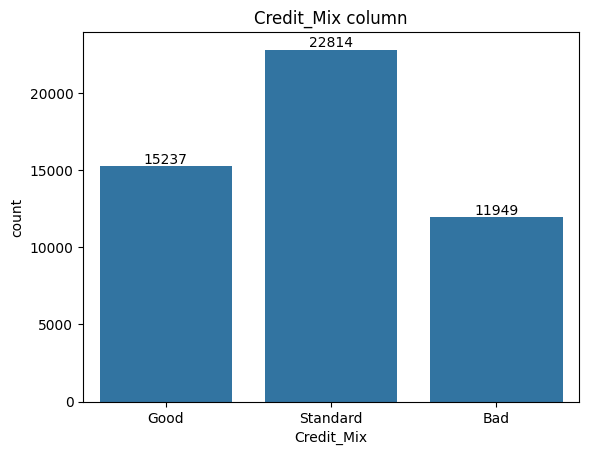

In [348]:
ax = sns.countplot(x = dataFrame.Credit_Mix)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')
plt.title("Credit_Mix column")
plt.show()

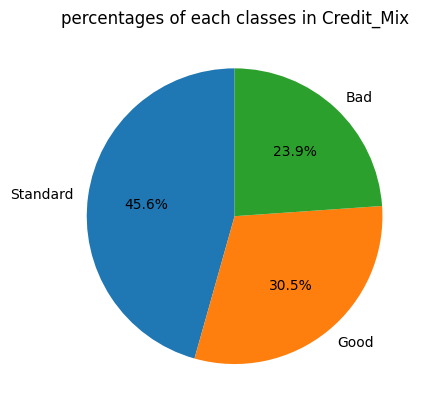

In [349]:
plt.pie(value_counts_Credit_Mix,labels=value_counts_Credit_Mix.index,startangle=90,autopct="%1.1f%%")
plt.title("percentages of each classes in Credit_Mix")
plt.show()

In [350]:
dataFrame_numeric_columns = [col for col in dataFrame.columns if is_numeric_dtype(dataFrame[col])]
print(dataFrame_numeric_columns)
print(len(dataFrame_numeric_columns))

['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Debt_Consolidation_Loan', 'Home_Equity_Loan', 'Student_Loan', 'Payday_Loan', 'Personal_Loan', 'Auto_Loan', 'Mortgage_Loan', 'Credit-Builder_Loan', 'Num_of_Loan_Types', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Months', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
26


In [351]:
for numeric_col in dataFrame_numeric_columns:
    print("==========---------------===========")
    print(f"Summary statistics of {numeric_col}")
    print(dataFrame[numeric_col].describe())

==========---------------===========
Summary statistics of Age
count    50000.000000
mean        34.948900
std          9.297033
min         19.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         56.000000
Name: Age, dtype: float64
==========---------------===========
Summary statistics of Annual_Income
count    5.000000e+04
mean     1.561380e+05
std      1.294278e+06
min      7.005930e+03
25%      2.006286e+04
50%      3.757587e+04
75%      6.995556e+04
max      2.413726e+07
Name: Annual_Income, dtype: float64
==========---------------===========
Summary statistics of Monthly_Inhand_Salary
count    50000.000000
mean      4017.693225
std       2952.479911
min        303.645417
25%       1794.304167
50%       3086.305000
75%       5338.967500
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64
==========---------------===========
Summary statistics of Num_Bank_Accounts
count    50000.000000
mean         5.377700
std          2.577195
min   

In [352]:
dataFrame_categorical_columns = [col for col in dataFrame.columns if not is_numeric_dtype(dataFrame[col])]
print(dataFrame_categorical_columns)
print(len(dataFrame_categorical_columns))

['Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour_lavel', 'Payment_Behaviour_size', 'Credit_Mix']
5


In [353]:
for cate_col in dataFrame_categorical_columns:
    print("==========---------------===========")
    print(f"Unique value counts of {cate_col}")
    print(dataFrame[cate_col].value_counts())

==========---------------===========
Unique value counts of Occupation
Occupation
Unknown          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: count, dtype: int64
==========---------------===========
Unique value counts of Payment_of_Min_Amount
Payment_of_Min_Amount
Yes    26158
No     17849
NM      5993
Name: count, dtype: int64
==========---------------===========
Unique value counts of Payment_Behaviour_lavel
Payment_Behaviour_lavel
Low        24783
High       21417
Unknown     3800
Name: count, dtype: int64
==========---------------===========
Unique value counts of Payment_Behaviour_size
Payment_Behaviour_size
Small      18345
Medium     15759
Large      12096
Unknown     3800
Name: count,

## 3. Model Building
- Train multiple machine learning models using the preprocessed data.
- Evaluate the suitability of various models for the task.


In [354]:
# XGBoost,LightGBM,RandomForest,CatBoost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [355]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  int64  
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  int64  
 8   Debt_Consolidation_Loan   50000 non-null  int64  
 9   Home_Equity_Loan          50000 non-null  int64  
 10  Student_Loan              50000 non-null  int64  
 11  Payday_Loan               50000 non-null  int64  
 12  Personal_Loan             50000 non-null  int64  
 13  Auto_Loan                 50000 non-null  int64  
 14  Mortgage_Lo

In [356]:
X = dataFrame.drop("Credit_Mix",axis=1)
Y = dataFrame.Credit_Mix

In [357]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  int64  
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  int64  
 8   Debt_Consolidation_Loan   50000 non-null  int64  
 9   Home_Equity_Loan          50000 non-null  int64  
 10  Student_Loan              50000 non-null  int64  
 11  Payday_Loan               50000 non-null  int64  
 12  Personal_Loan             50000 non-null  int64  
 13  Auto_Loan                 50000 non-null  int64  
 14  Mortgage_Lo

In [358]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 50000 entries, 0 to 49999
Series name: Credit_Mix
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 781.2+ KB


In [359]:
# spliting training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.30,random_state=42)

In [360]:
print(f"train data shapes: {xtrain.shape},{ytrain.shape}")
print(f"test data shapes: {xtest.shape},{ytest.shape}")

train data shapes: (35000, 30),(35000,)
test data shapes: (15000, 30),(15000,)


In [361]:
# spliting validation and test data
xtest,xval,ytest,yval = train_test_split(xtest,ytest,test_size=0.50,random_state=42)

In [362]:
print(f"test data shapes: {xtest.shape},{ytest.shape}")
print(f"validation data shapes: {xval.shape},{yval.shape}")

test data shapes: (7500, 30),(7500,)
validation data shapes: (7500, 30),(7500,)


In [363]:
credit_mix_le = LabelEncoder()
ytrain = credit_mix_le.fit_transform(ytrain)
ytest = credit_mix_le.transform(ytest)
yval = credit_mix_le.transform(yval)

In [364]:
dataFrame_categorical_columns

['Occupation',
 'Payment_of_Min_Amount',
 'Payment_Behaviour_lavel',
 'Payment_Behaviour_size',
 'Credit_Mix']

In [365]:
encode_cols = ['Occupation','Payment_of_Min_Amount','Payment_Behaviour_lavel','Payment_Behaviour_size']

In [366]:
scalr_col = ["Amount_invested_monthly","Num_Credit_Inquiries","Annual_Income"] # detected extreme outlier from EDA report

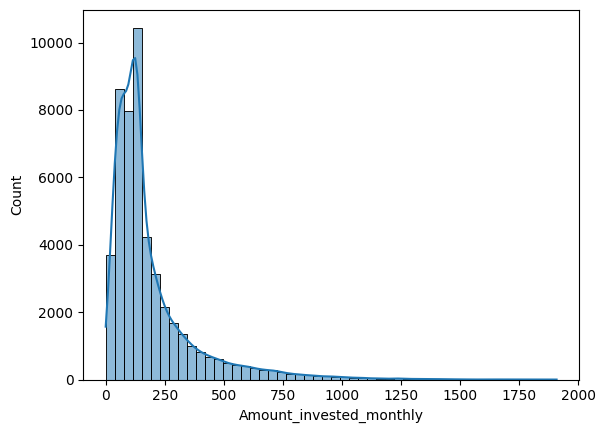

In [367]:
sns.histplot(dataFrame.Amount_invested_monthly,bins=50,kde=True)
plt.show()

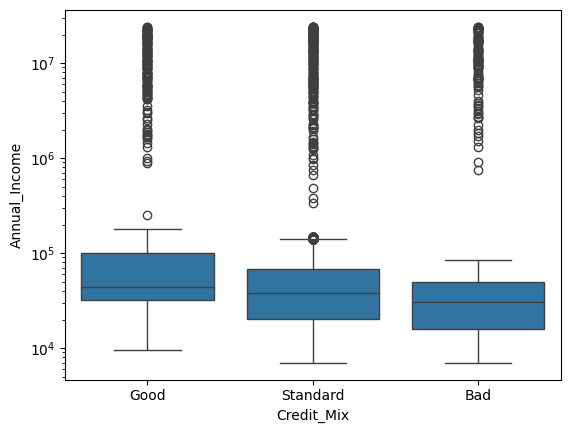

In [368]:
sns.boxplot(y=dataFrame.Annual_Income,x=dataFrame.Credit_Mix) # checking oulier for annual income
plt.yscale("log")

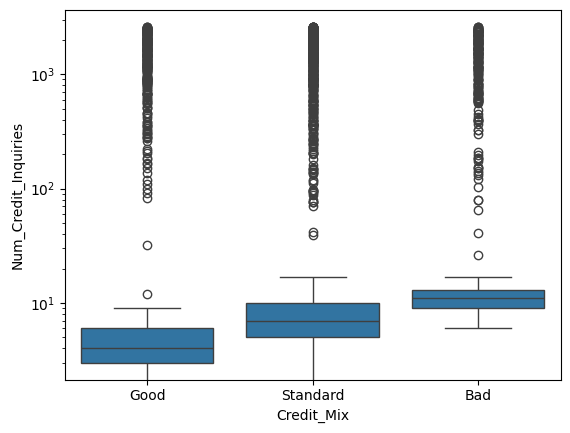

In [369]:
sns.boxplot(y=dataFrame.Num_Credit_Inquiries,x=dataFrame.Credit_Mix)
plt.yscale("log")

In [370]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [371]:
preprocessor_rf = ColumnTransformer(
    transformers=[
    ("ordinal",OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),encode_cols)
],
remainder="passthrough"
)

preprocessor_xgb = ColumnTransformer(
    transformers=[
    ("ordinal",OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1),encode_cols),
    ("robustscalar",RobustScaler(),scalr_col)
],remainder="passthrough")

preprocessor_lgbm = ColumnTransformer(
    transformers=[
    ("ordinal",OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1),encode_cols),
    ("robustscalar",RobustScaler(),scalr_col)
],remainder="passthrough")


In [372]:
preprocessors = {
    "RandomForest": preprocessor_rf,
    "XGBoost": preprocessor_xgb,
    "LightGBM": preprocessor_lgbm,
}

In [373]:
# calculating class weights
dataFrame.Credit_Mix.value_counts()

Credit_Mix
Standard    22814
Good        15237
Bad         11949
Name: count, dtype: int64

In [374]:
# calculating weights-------
counts = np.array([11949, 15237, 22814])  # Bad, Good, Standard
total = counts.sum()
num_classes = 3

weights = total / (num_classes * counts)
weights

array([1.39481686, 1.09382862, 0.73054557])

In [375]:
cat_indices = [X.columns.get_loc(col) for col in encode_cols]
cat_indices

[1, 24, 27, 28]

In [376]:
models_ = {
    "RandomForest": RandomForestClassifier(
        n_estimators=600,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features="sqrt",
        bootstrap=True,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    ),

    "XGBoost": XGBClassifier(
        objective="multi:softmax",
        num_class=3,
        random_state=42,
        n_jobs=-1
    ),

    "LightGBM": LGBMClassifier(
        objective="multiclass",
        num_class=3,
        random_state=42,
        class_weight="balanced",
    ),

}

In [377]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,classification_report,precision_score,f1_score,recall_score,roc_auc_score

In [378]:
models_result=[]

In [379]:

trained_models = {}
for name,model in models_.items():
    print(f"===========----// Training {name} \\----=============")
    pipe = Pipeline(steps=[
        ("preprocessor",preprocessors[name]),
        ("model",model)
    ])

    pipe.fit(xtrain,ytrain)

    # predictions
    ytrain_pre = pipe.predict(xtrain)
    ytest_pre = pipe.predict(xtest)

    # probabilitis
    ytest_proba = pipe.predict_proba(xtest)

    # trianing and test auuracy
    train_score = accuracy_score(ytrain,ytrain_pre)
    test_score = accuracy_score(ytest,ytest_pre)

    # precision, recall and f1 scores
    precision = precision_score(ytest,ytest_pre,average="weighted")
    recall = recall_score(ytest,ytest_pre,average="weighted")
    f1 = f1_score(ytest,ytest_pre,average="weighted")

    # roc_auc_score
    auc = roc_auc_score(ytest,ytest_proba,multi_class="ovo",average="weighted")

    # storing scores
    models_result.append({
        "Model":name,
        "Training_score": train_score,
        "test_score": test_score,
        "Precision_score": precision,
        "Recall": recall,
        "F1_score": f1,
        "ROC-AUC": auc
    })

    trained_models[f"{name}"] = pipe
    print(f"Test accuracy: {test_score:.4f}")
    print(f"============----XX--Execution completed for {name}--XX----============")


===========----// Training RandomForest \----=============
Test accuracy: 0.9669
============----XX--Execution completed for RandomForest--XX----============
===========----// Training XGBoost \----=============
Test accuracy: 0.9709
============----XX--Execution completed for XGBoost--XX----============
===========----// Training LightGBM \----=============
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2799
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 30
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


C:\Users\ShahriarHA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ShahriarHA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test accuracy: 0.9649
============----XX--Execution completed for LightGBM--XX----============


C:\Users\ShahriarHA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [380]:
models_result

[{'Model': 'RandomForest',
  'Training_score': 0.9922857142857143,
  'test_score': 0.9669333333333333,
  'Precision_score': 0.9670804169375905,
  'Recall': 0.9669333333333333,
  'F1_score': 0.966884497093508,
  'ROC-AUC': np.float64(0.9974418088878366)},
 {'Model': 'XGBoost',
  'Training_score': 0.9968571428571429,
  'test_score': 0.9709333333333333,
  'Precision_score': 0.9709536951266498,
  'Recall': 0.9709333333333333,
  'F1_score': 0.9709227927500536,
  'ROC-AUC': np.float64(0.9980816312310288)},
 {'Model': 'LightGBM',
  'Training_score': 0.9888857142857143,
  'test_score': 0.9649333333333333,
  'Precision_score': 0.9651908014267527,
  'Recall': 0.9649333333333333,
  'F1_score': 0.9648842978936342,
  'ROC-AUC': np.float64(0.9977029182942755)}]

## 4. Model Evaluation
- Compute and plot evaluation metrics for all models, such as accuracy, precision, recall, F1-score, and AUC-ROC.
- Compare the performance of models across multiple metrics.


C:\Users\ShahriarHA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


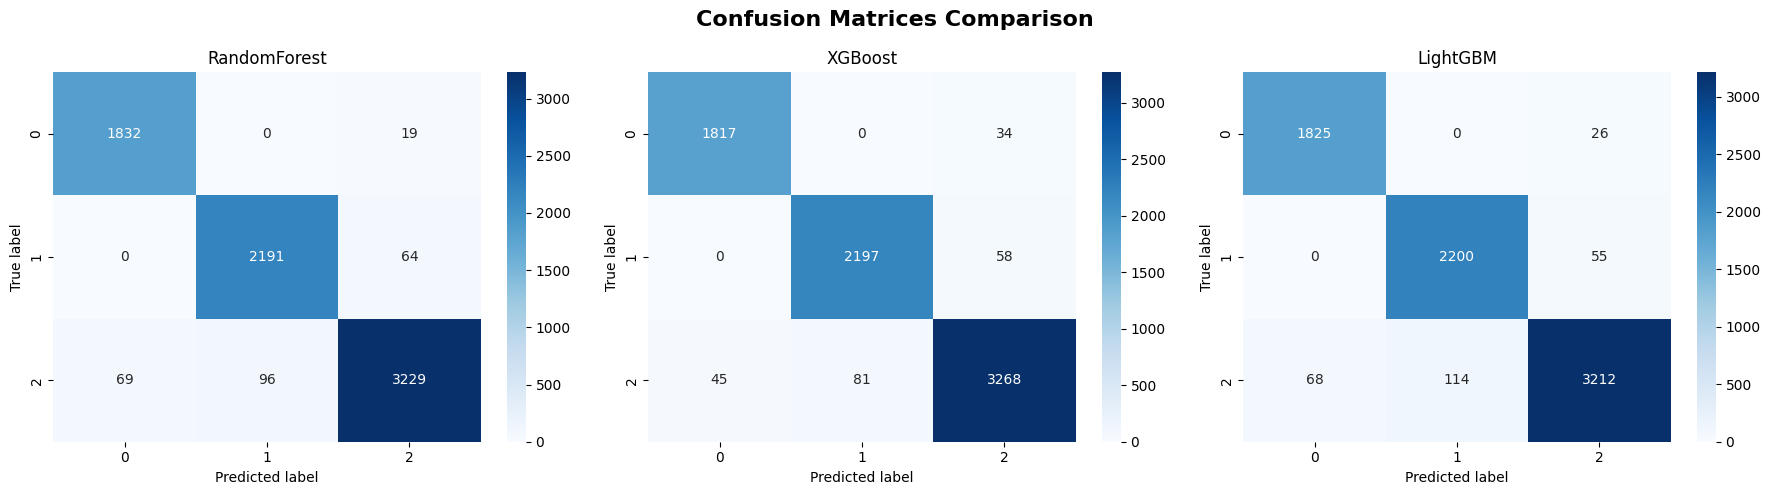

In [381]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices Comparison",weight="bold",size="16")

for ax, (name, model) in zip(axes, trained_models.items()):
    y_pred = model.predict(xtest)
    cm = confusion_matrix(ytest, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=ax
    )

    ax.set_title(name)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

plt.tight_layout()
plt.show()


In [382]:
models_result

[{'Model': 'RandomForest',
  'Training_score': 0.9922857142857143,
  'test_score': 0.9669333333333333,
  'Precision_score': 0.9670804169375905,
  'Recall': 0.9669333333333333,
  'F1_score': 0.966884497093508,
  'ROC-AUC': np.float64(0.9974418088878366)},
 {'Model': 'XGBoost',
  'Training_score': 0.9968571428571429,
  'test_score': 0.9709333333333333,
  'Precision_score': 0.9709536951266498,
  'Recall': 0.9709333333333333,
  'F1_score': 0.9709227927500536,
  'ROC-AUC': np.float64(0.9980816312310288)},
 {'Model': 'LightGBM',
  'Training_score': 0.9888857142857143,
  'test_score': 0.9649333333333333,
  'Precision_score': 0.9651908014267527,
  'Recall': 0.9649333333333333,
  'F1_score': 0.9648842978936342,
  'ROC-AUC': np.float64(0.9977029182942755)}]

In [383]:

models1=[]
Training_score=[]
test_score=[]
Precision_score=[]
Recall=[]
F1_score=[]
ROC_AUC = []
for i in models_result:
    # print(i["Model"],i["test_score"],i["Training_score"])
    models1.append(i["Model"])
    Training_score.append(i["Training_score"])
    test_score.append(i["test_score"])
    Precision_score.append(i["Precision_score"])
    Recall.append(i["Recall"])
    F1_score.append(i["F1_score"])
    ROC_AUC.append(i["ROC-AUC"])

In [384]:
models_result_df = pd.DataFrame({
    "Models":models1,
    "Training_score": Training_score,
    "Test_score": test_score,
    "Precision_score": Precision_score,
    "Recall_score": Recall,
    "F1_score": F1_score,
    "ROC_AUC": ROC_AUC
})
models_result_df

,Models,Training_score,Test_score,Precision_score,Recall_score,F1_score,ROC_AUC
0,RandomForest,0.992286,0.966933,0.967080,0.966933,0.966884,0.997442
1,XGBoost,0.996857,0.970933,0.970954,0.970933,0.970923,0.998082
2,LightGBM,0.988886,0.964933,0.965191,0.964933,0.964884,0.997703


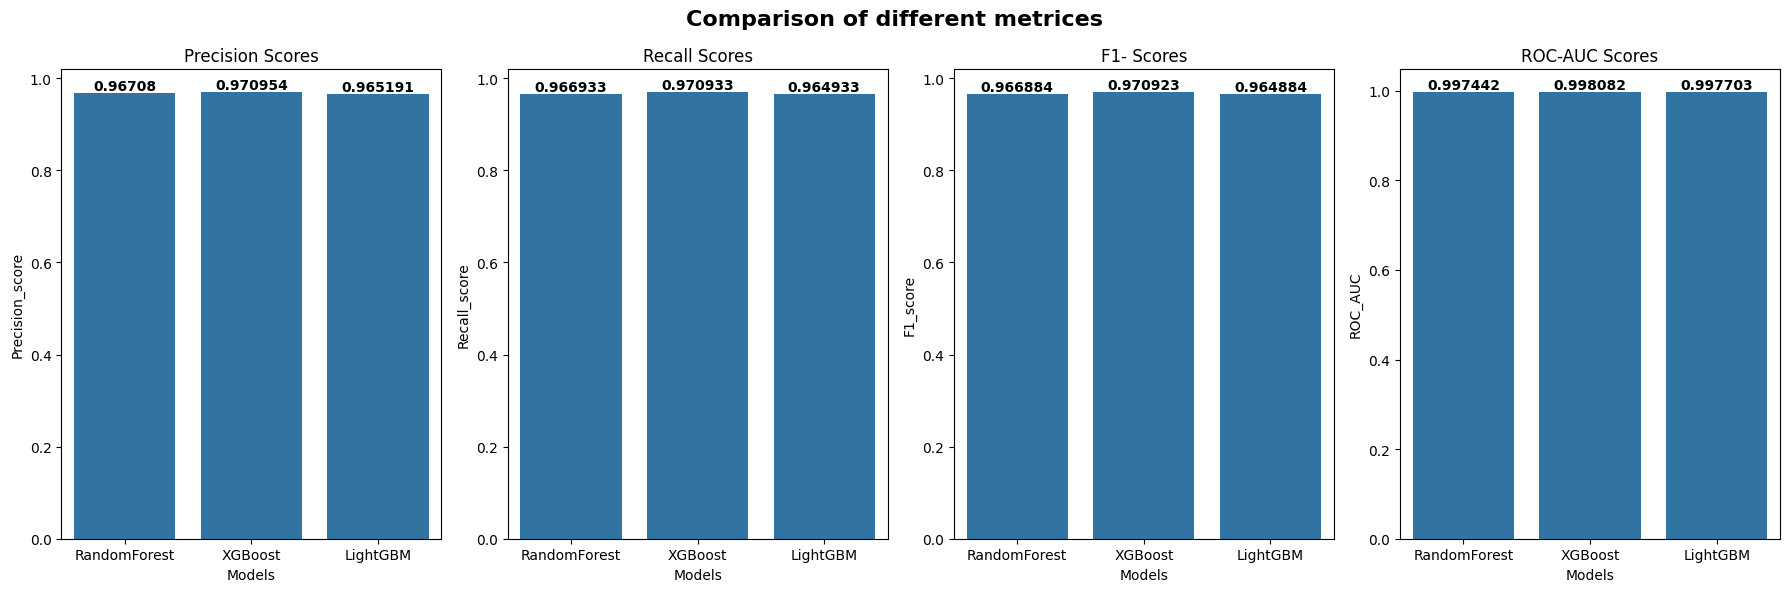

In [385]:

fig, axs = plt.subplots(1, 4, figsize=(18, 6))
fig.suptitle("Comparison of different metrices",weight="bold",size="16")



a = sns.barplot(x=models_result_df.Models,y=models_result_df.Precision_score,ax=axs[0])
a.set_title("Precision Scores")
for container in a.containers:
    a.bar_label(container,label_type="edge",weight="bold")

b = sns.barplot(x=models_result_df.Models,y=models_result_df.Recall_score,ax=axs[1])
b.set_title("Recall Scores")
for container in b.containers:
    b.bar_label(container,label_type="edge",weight="bold")

c=sns.barplot(x=models_result_df.Models,y=models_result_df.F1_score,ax=axs[2])
c.set_title("F1- Scores")
for container in c.containers:
    c.bar_label(container,label_type="edge",weight="bold")

d = sns.barplot(x=models_result_df.Models,y=models_result_df.ROC_AUC,ax=axs[3])
d.set_title("ROC-AUC Scores")
for container in d.containers:
    d.bar_label(container,label_type="edge",weight="bold")

plt.tight_layout()
plt.show()



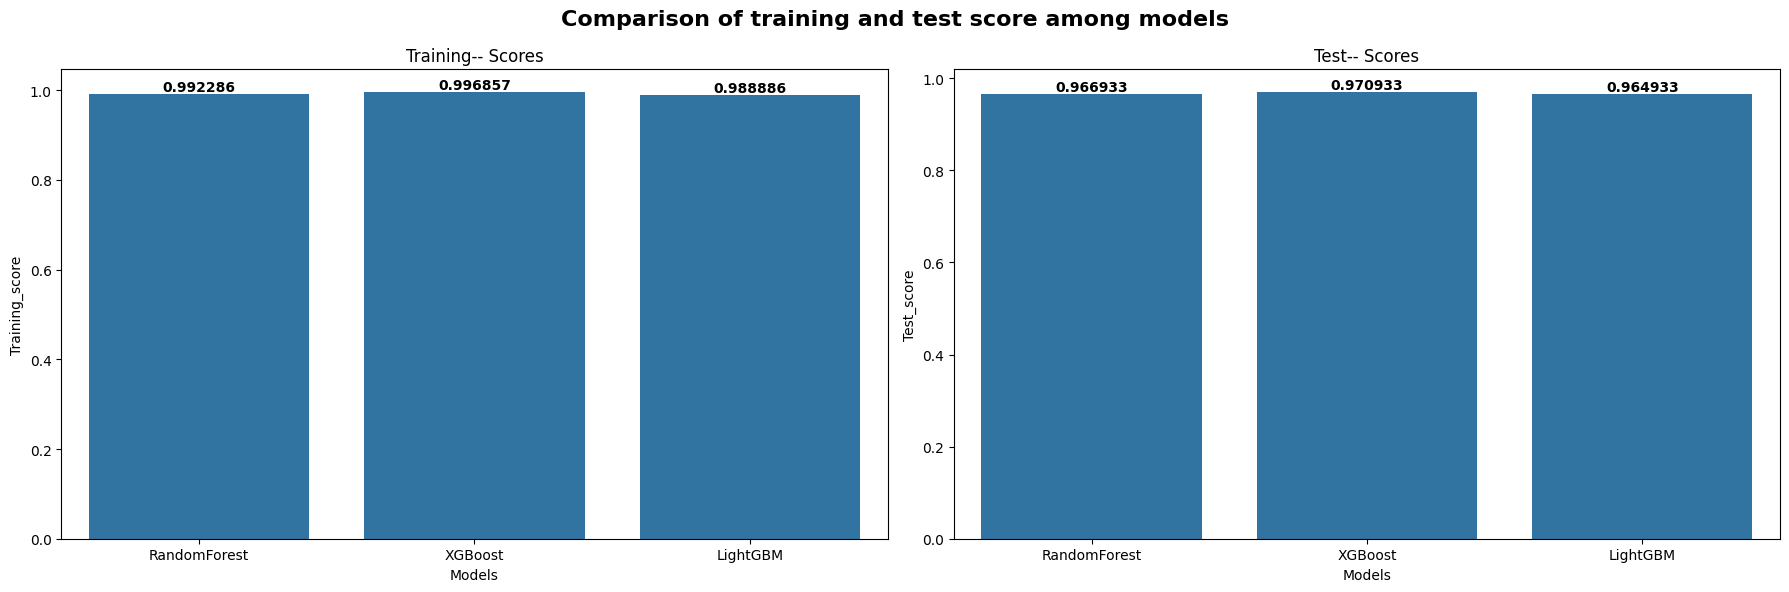

In [386]:

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle("Comparison of training and test score among models",weight="bold",size="16")

a = sns.barplot(x=models_result_df.Models,y=models_result_df.Training_score,ax=axs[0])
a.set_title("Training-- Scores")
for container in a.containers:
    a.bar_label(container,label_type="edge",weight="bold")

b = sns.barplot(x=models_result_df.Models,y=models_result_df.Test_score,ax=axs[1])
b.set_title("Test-- Scores")
for container in b.containers:
    b.bar_label(container,label_type="edge",weight="bold")

plt.tight_layout()
plt.show()



## 5. Hyperparameter Tuning
- Optimize hyperparameters for each model using systematic search methods.
- Identify the best configuration for improved performance.


In [387]:
para_grid = {
    "RandomForest": {
        "n_estimators": [300, 500, 700],
        "max_depth": [10, 15, 20, 25, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"],
        "criterion": ["gini", "entropy"],
    },

    "XGBoost": {
        "n_estimators": [200, 400, 600],
        "max_depth": [5, 8, 12],
        "learning_rate": [0.03, 0.05, 0.1],
        "subsample": [0.7, 0.8, 1.0],
        "colsample_bytree": [0.7, 0.8, 1.0],
        "gamma": [0, 1, 5],
        "min_child_weight": [1, 3, 5],
    },

    "LightGBM": {
        "n_estimators": [200, 400, 600],
        "learning_rate": [0.1, 0.03, 0.05],
        "max_depth": [-1, 10, 20],
        "num_leaves": [31, 63, 127],
        "min_data_in_leaf": [20, 40, 60],
        "subsample": [0.7, 0.8, 1.0],
        "colsample_bytree": [0.7, 0.8, 1.0],
        
    }

    
}

## 6. Retrain Models
- Retrain all models using the optimal hyperparameters on the training data.
- Validate the models on unseen data to ensure robustness.

In [388]:
from sklearn.model_selection import RandomizedSearchCV

In [389]:
models_1 = {
    "RandomForest": RandomForestClassifier(random_state=42,class_weight='balanced_subsample'),

    "XGBoost": XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        random_state=42,
        eval_metric="mlogloss"
    ),

    "LightGBM": LGBMClassifier(
        objective="multiclass",
        num_class=3,
        class_weight="balanced",
        random_state=42,
        verbose=-1
    ),

}

In [396]:
rodomized_res = {}
best_estimator = {}
model_names=[]
best_scores=[]
best_para =[]
for name,model in models_1.items():
    print(f"====// Running Randomized search for -> {name} \\====")
    pipe = Pipeline(steps=[
        ("preprocessor",preprocessors[name]),
        ("model",model)
    ])

    param_dist = {
        f"model__{k}": v for k, v in para_grid[name].items()
    }

    randomized_search = RandomizedSearchCV(
        estimator = pipe,
        param_distributions = param_dist,
        n_iter=60,
        cv=3,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    randomized_search.fit(xtrain,ytrain)
    model_names.append(name)
    best_scores.append(randomized_search.best_score_)
    best_para.append(randomized_search.best_params_)

    best_estimator[name] = randomized_search.best_estimator_
    print(f"Best parameter for {name} -> {randomized_search.best_params_}")




====// Running Randomized search for -> RandomForest \====
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameter for RandomForest -> {'model__n_estimators': 700, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': None, 'model__criterion': 'entropy'}
====// Running Randomized search for -> XGBoost \====
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameter for XGBoost -> {'model__subsample': 0.8, 'model__n_estimators': 600, 'model__min_child_weight': 1, 'model__max_depth': 12, 'model__learning_rate': 0.1, 'model__gamma': 0, 'model__colsample_bytree': 1.0}
====// Running Randomized search for -> LightGBM \====
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameter for LightGBM -> {'model__subsample': 0.7, 'model__num_leaves': 127, 'model__n_estimators': 200, 'model__min_data_in_leaf': 20, 'model__max_depth': 20, 'model__learning_rate': 0.1, 'model__colsample_by

In [397]:
best_estimator

{'RandomForest': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('ordinal',
                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                  unknown_value=-1),
                                                   ['Occupation',
                                                    'Payment_of_Min_Amount',
                                                    'Payment_Behaviour_lavel',
                                                    'Payment_Behaviour_size'])])),
                 ('model',
                  RandomForestClassifier(class_weight='balanced_subsample',
                                         criterion='entropy', n_estimators=700,
                                         random_state=42))]),
 'XGBoost': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder

In [398]:
rodomized_res={
    "model_names": model_names,
    "best_scores": best_scores,
    "best_parameter": best_para
}

In [399]:
rodomized_res

{'model_names': ['RandomForest', 'XGBoost', 'LightGBM'],
 'best_scores': [np.float64(0.9662857076998702),
  np.float64(0.9691428693377245),
  np.float64(0.9711428660755906)],
 'best_parameter': [{'model__n_estimators': 700,
   'model__min_samples_split': 2,
   'model__min_samples_leaf': 1,
   'model__max_features': 'sqrt',
   'model__max_depth': None,
   'model__criterion': 'entropy'},
  {'model__subsample': 0.8,
   'model__n_estimators': 600,
   'model__min_child_weight': 1,
   'model__max_depth': 12,
   'model__learning_rate': 0.1,
   'model__gamma': 0,
   'model__colsample_bytree': 1.0},
  {'model__subsample': 0.7,
   'model__num_leaves': 127,
   'model__n_estimators': 200,
   'model__min_data_in_leaf': 20,
   'model__max_depth': 20,
   'model__learning_rate': 0.1,
   'model__colsample_bytree': 0.7}]}

In [421]:
rf_best = best_estimator["RandomForest"]
rf_y_pre = rf_best.predict(xtest)
print(f"Classification report of -->'RandomForest-best_estimator'\n{classification_report(ytest,rf_y_pre)}")
print(f"Validation score--> {rf_best.score(xval,yval):.2f}")

Classification report of -->'RandomForest-best_estimator'
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1851
           1       0.97      0.97      0.97      2255
           2       0.97      0.97      0.97      3394

    accuracy                           0.97      7500
   macro avg       0.97      0.98      0.97      7500
weighted avg       0.97      0.97      0.97      7500

Validation score--> 0.97


In [422]:
lgbm_best = best_estimator["LightGBM"]
lgbm_y_pre = lgbm_best.predict(xtest)
print(f"Classification report of --> 'LightGBM-best_estimator' \n{classification_report(ytest,lgbm_y_pre)}")
print(f"Validation score--> {lgbm_best.score(xval,yval):.2f}")

Classification report of --> 'LightGBM-best_estimator' 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1851
           1       0.98      0.98      0.98      2255
           2       0.98      0.97      0.98      3394

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500

Validation score--> 0.98


C:\Users\ShahriarHA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ShahriarHA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [423]:
xgb_best = best_estimator["XGBoost"]
lgbm_y_pre = xgb_best.predict(xtest)
print(f"Classification report of --> 'XGBoost-best_estimator' \n{classification_report(ytest,lgbm_y_pre)}")
print(f"Validation score--> {xgb_best.score(xval,yval):.2f}")

Classification report of --> 'XGBoost-best_estimator' 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1851
           1       0.98      0.98      0.98      2255
           2       0.97      0.97      0.97      3394

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500

Validation score--> 0.97


## 7. Final Performance and Cross-Validation
- Evaluate the final performance of each model using cross-validation scores.
- Compare results to select the best-performing model.


In [406]:
randomized_res_df = pd.DataFrame(rodomized_res)
randomized_res_df

,model_names,best_scores,best_parameter
0,RandomForest,0.966286,"{'model__n_estimators': 700, 'model__min_sampl..."
1,XGBoost,0.969143,"{'model__subsample': 0.8, 'model__n_estimators..."
2,LightGBM,0.971143,"{'model__subsample': 0.7, 'model__num_leaves':..."


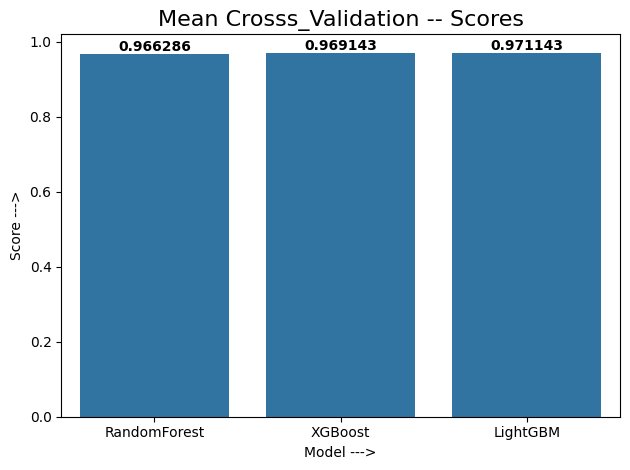

In [416]:


a = sns.barplot(x=randomized_res_df.model_names,y=randomized_res_df.best_scores)
a.set_title("Mean Crosss_Validation -- Scores",size="16")
for container in a.containers:
    a.bar_label(container,label_type="edge",weight="bold")
a.set_xlabel("Model --->")
a.set_ylabel("Score --->")
plt.tight_layout()
plt.show()



C:\Users\ShahriarHA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


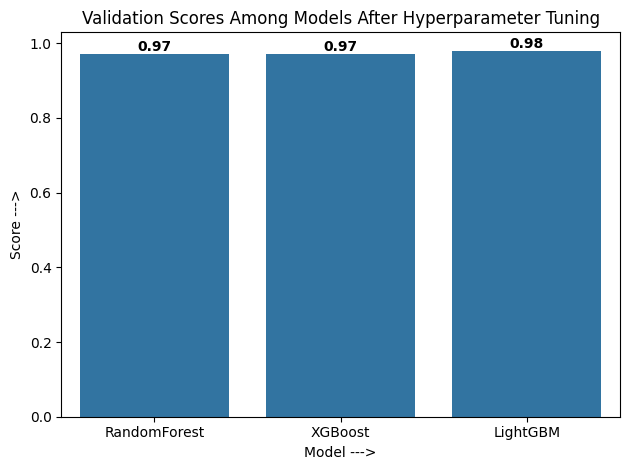

In [425]:
xx = ["RandomForest","XGBoost","LightGBM"]
yy = [round(rf_best.score(xval,yval),2),round(xgb_best.score(xval,yval),2),round(lgbm_best.score(xval,yval),2)]

a = sns.barplot(x=xx,y=yy)
a.set_title("Validation Scores Among Models After Hyperparameter Tuning",size="12")
for container in a.containers:
    a.bar_label(container,label_type="edge",weight="bold")
a.set_xlabel("Model --->")
a.set_ylabel("Score --->")
plt.tight_layout()
plt.show()

C:\Users\ShahriarHA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


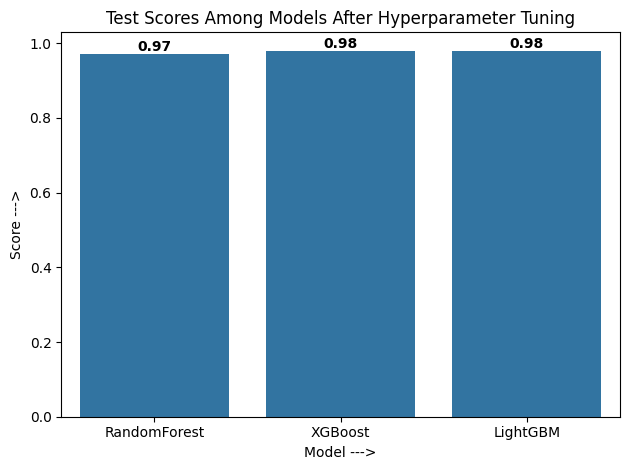

In [426]:
xx = ["RandomForest","XGBoost","LightGBM"]
yy = [round(rf_best.score(xtest,ytest),2),round(xgb_best.score(xtest,ytest),2),round(lgbm_best.score(xtest,ytest),2)]

a = sns.barplot(x=xx,y=yy)
a.set_title("Test Scores Among Models After Hyperparameter Tuning",size="12")
for container in a.containers:
    a.bar_label(container,label_type="edge",weight="bold")
a.set_xlabel("Model --->")
a.set_ylabel("Score --->")
plt.tight_layout()
plt.show()

## 8. Suggestions
- Provide recommendations based on the model insights and analysis.
- Suggest actionable steps to improve outcomes or address any gaps identified during the project.
